# Study Corrupted Inputs #

How can we tell what inputs actually matter to the models? In the paper, we describe the conjecture that the models care almost entirely about $n \bmod 2$ and $n \bmod 3$, largely ignoring all of the remaining input data.

One way to test this is to deliberately **corrupt** various pieces of input data. For example, if we corrupt (e.g. by making completely random)  $n \bmod p$ for all primes $p \neq 2, 3$, but the predictions of the model don't change, then we have very strong evidence that the model only considers the primes $2$ and $3$. Similarly, if we corrupt $2$ and $3$ but leave all the remaining primes, and if the model then performs radically different, then we have strong evidence that the model uses the primes $2$ and $3$ in important ways.

We now set out to test these.


## Generating Corrupt Datafiles ##

The logic to create the corrupt datafiles is in [scripts/generate_corrupted_datafiles.py](../scripts/generate_corrupted_datafiles.py). It takes some time. The easiest way to generate this is

    cd ../scripts
    make corrupted_data
    
This will populate `/input` with several new files.

- `mu_only23_correct.txt` (only $p = 2$ and $p = 3$ correct, others are random)
- `musq_only23_correct.txt` (same, but with $\mu^2(\cdot)$ output)
- `mu_2_random.txt` (randomize $p = 2$ input, keep all others accurate)
- `musq_2_random.txt` (same, but with $\mu^2(\cdot)$)
- `mu_p_3_random.txt` (randomize $p = 3$ input, keep all others accurate)
- `musq_p_3_random.txt` (same, but with $\mu^2(\cdot)$)
- `mu_23_random.txt` (randomize both $p = 2$ and $p = 3$, keep all others accurate)
- `musq_23_random.txt` (same, but with $\mu^2(\cdot)$)
- `mu_true.txt` (correct data)
- `musq_true.txt` (correct data, but for $\mu^2(\cdot)$)

Each of these files will have use the same input integers $n$, but with the generated datafiles corrupted in the prescribed ways. We use the same integers $n$ to hold as much constant between different tests as possible.

Below, we call Int2Int on these files, capture the outputs, and then study the results.

In [1]:
import subprocess


mu_cmd_string = "python ~/Int2Int/train.py --num_workers 0 --dump_path '/home/user/fastdir/dump' --exp_name basic --exp_id 3 --eval_only True --eval_data '/home/user/fastdir/data/{}' --eval_size 20000 --data_types 'int[200]:range(-1,2)' 2>&1 | tee '/home/user/fastdir/records/{}'"
musq_cmd_string = "python ~/Int2Int/train.py --num_workers 0 --dump_path '/home/user/fastdir/dump' --exp_name basicsq --exp_id 2 --eval_only True --eval_data '/home/user/fastdir/data/{}' --eval_size 20000 --data_types 'int[200]:range(-1,2)' 2>&1 | tee '/home/user/fastdir/records/{}'"

In [2]:
for mu_file in ['mu_only23_correct.txt', 'mu_2_random.txt', 'mu_p_3_random.txt', 'mu_23_random.txt', 'mu_true.txt']:    
    subprocess.run(mu_cmd_string.format(mu_file, mu_file + ".record"), shell=True)

INFO - 07/22/25 19:11:42 - 0:00:00 - ============ Initialized logger ============
INFO - 07/22/25 19:11:42 - 0:00:00 - GRU: False
                                     accumulate_gradients: 1
                                     act_bias: 0
                                     act_biased: False
                                     act_ponder_coupling: 0.01
                                     act_threshold: 0.01
                                     amp: -1
                                     architecture: encoder_decoder
                                     attention_dropout: 0
                                     base: 1000
                                     batch_load: False
                                     batch_size: 32
                                     batch_size_eval: 128
                                     beam_early_stopping: True
                                     beam_eval: False
                                     beam_eval_train: 0
                             

INFO - 07/22/25 19:11:42 - 0:00:00 - Found 177 parameters in model.


INFO - 07/22/25 19:11:43 - 0:00:01 - Optimizer: <class 'src.optim.Adam'>
WARNING - 07/22/25 19:11:43 - 0:00:01 - Reloading checkpoint from /home/user/fastdir/dump/basic/3/checkpoint.pth ...
/home/user/Int2Int/src/trainer.py:303: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of t

INFO - 07/22/25 19:11:44 - 0:00:02 - Loaded 100000 equations from the disk.
SLURM job: False
0 - Number of nodes: 1
0 - Node ID        : 0
0 - Local rank     : 0
0 - Global rank    : 0
0 - World size     : 1
0 - GPUs per node  : 1
0 - Master         : True
0 - Multi-node     : False
0 - Multi-GPU      : False
0 - Hostname       : compute-server-1


INFO - 07/22/25 19:11:45 - 0:00:03 - (128/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:45 - 0:00:03 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:45 - 0:00:03 - (256/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:45 - 0:00:03 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:45 - 0:00:03 - (384/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:45 - 0:00:03 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:46 - 0:00:04 - (512/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:46 - 0:00:04 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:46 - 0:00:04 - (640/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:46 - 0:00:04 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:46 - 0:00:04 - (768/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:46 - 0:00:04 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:46 - 0:00:04 - (896/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:46 - 0:00:04 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:47 - 0:00:05 - (1024/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:47 - 0:00:05 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:47 - 0:00:05 - (1152/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:47 - 0:00:05 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:47 - 0:00:05 - (1280/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:47 - 0:00:05 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:47 - 0:00:05 - (1408/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:48 - 0:00:06 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:48 - 0:00:06 - (1536/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:48 - 0:00:06 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:48 - 0:00:06 - (1664/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:48 - 0:00:06 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:48 - 0:00:06 - (1792/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:48 - 0:00:06 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:49 - 0:00:07 - (1920/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:49 - 0:00:07 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:49 - 0:00:07 - (2048/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:49 - 0:00:07 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:49 - 0:00:07 - (2176/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:49 - 0:00:07 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:49 - 0:00:07 - (2304/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:49 - 0:00:07 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:50 - 0:00:08 - (2432/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:50 - 0:00:08 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:50 - 0:00:08 - (2560/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:50 - 0:00:08 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:50 - 0:00:08 - (2688/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:50 - 0:00:08 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:51 - 0:00:08 - (2816/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:51 - 0:00:09 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:51 - 0:00:09 - (2944/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:51 - 0:00:09 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:51 - 0:00:09 - (3072/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:51 - 0:00:09 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:51 - 0:00:09 - (3200/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:51 - 0:00:09 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:52 - 0:00:10 - (3328/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:52 - 0:00:10 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:52 - 0:00:10 - (3456/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:52 - 0:00:10 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:52 - 0:00:10 - (3584/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:52 - 0:00:10 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:52 - 0:00:10 - (3712/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:52 - 0:00:10 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:53 - 0:00:11 - (3840/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:53 - 0:00:11 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:53 - 0:00:11 - (3968/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:53 - 0:00:11 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:53 - 0:00:11 - (4096/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:53 - 0:00:11 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:54 - 0:00:12 - (4224/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:54 - 0:00:12 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:54 - 0:00:12 - (4352/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:54 - 0:00:12 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:54 - 0:00:12 - (4480/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:54 - 0:00:12 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:54 - 0:00:12 - (4608/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:54 - 0:00:12 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:55 - 0:00:13 - (4736/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:55 - 0:00:13 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:55 - 0:00:13 - (4864/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:55 - 0:00:13 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:55 - 0:00:13 - (4992/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:55 - 0:00:13 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:55 - 0:00:13 - (5120/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:55 - 0:00:13 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:56 - 0:00:14 - (5248/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:56 - 0:00:14 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:56 - 0:00:14 - (5376/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:56 - 0:00:14 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:56 - 0:00:14 - (5504/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:56 - 0:00:14 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:57 - 0:00:15 - (5632/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:57 - 0:00:15 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:57 - 0:00:15 - (5760/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:57 - 0:00:15 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:57 - 0:00:15 - (5888/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:57 - 0:00:15 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:57 - 0:00:15 - (6016/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:57 - 0:00:15 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:58 - 0:00:16 - (6144/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:58 - 0:00:16 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:58 - 0:00:16 - (6272/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:58 - 0:00:16 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:58 - 0:00:16 - (6400/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:58 - 0:00:16 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:58 - 0:00:16 - (6528/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:59 - 0:00:17 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:59 - 0:00:17 - (6656/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:59 - 0:00:17 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:59 - 0:00:17 - (6784/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:59 - 0:00:17 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:11:59 - 0:00:17 - (6912/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:11:59 - 0:00:17 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:00 - 0:00:18 - (7040/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:00 - 0:00:18 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:00 - 0:00:18 - (7168/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:00 - 0:00:18 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:00 - 0:00:18 - (7296/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:00 - 0:00:18 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:00 - 0:00:18 - (7424/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:00 - 0:00:18 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:01 - 0:00:19 - (7552/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:01 - 0:00:19 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:01 - 0:00:19 - (7680/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:01 - 0:00:19 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:01 - 0:00:19 - (7808/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:01 - 0:00:19 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:02 - 0:00:20 - (7936/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:02 - 0:00:20 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:02 - 0:00:20 - (8064/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:02 - 0:00:20 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:02 - 0:00:20 - (8192/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:02 - 0:00:20 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:02 - 0:00:20 - (8320/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:02 - 0:00:20 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:03 - 0:00:21 - (8448/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:03 - 0:00:21 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:03 - 0:00:21 - (8576/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:03 - 0:00:21 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:03 - 0:00:21 - (8704/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:03 - 0:00:21 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:03 - 0:00:21 - (8832/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:04 - 0:00:21 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:04 - 0:00:22 - (8960/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:04 - 0:00:22 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:04 - 0:00:22 - (9088/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:04 - 0:00:22 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:04 - 0:00:22 - (9216/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:04 - 0:00:22 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:05 - 0:00:23 - (9344/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:05 - 0:00:23 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:05 - 0:00:23 - (9472/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:05 - 0:00:23 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:05 - 0:00:23 - (9600/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:05 - 0:00:23 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:05 - 0:00:23 - (9728/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:05 - 0:00:23 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:06 - 0:00:24 - (9856/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:06 - 0:00:24 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:06 - 0:00:24 - (9984/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:06 - 0:00:24 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:06 - 0:00:24 - (10112/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:06 - 0:00:24 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:06 - 0:00:24 - (10240/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:07 - 0:00:25 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:07 - 0:00:25 - (10368/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:07 - 0:00:25 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:07 - 0:00:25 - (10496/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:07 - 0:00:25 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:07 - 0:00:25 - (10624/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:07 - 0:00:25 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:08 - 0:00:26 - (10752/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:08 - 0:00:26 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:08 - 0:00:26 - (10880/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:08 - 0:00:26 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:08 - 0:00:26 - (11008/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:08 - 0:00:26 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:08 - 0:00:26 - (11136/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:08 - 0:00:26 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:09 - 0:00:27 - (11264/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:09 - 0:00:27 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:09 - 0:00:27 - (11392/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:09 - 0:00:27 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:09 - 0:00:27 - (11520/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:09 - 0:00:27 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:10 - 0:00:28 - (11648/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:10 - 0:00:28 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:10 - 0:00:28 - (11776/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:10 - 0:00:28 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:10 - 0:00:28 - (11904/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:10 - 0:00:28 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:10 - 0:00:28 - (12032/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:10 - 0:00:28 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:11 - 0:00:29 - (12160/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:11 - 0:00:29 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:11 - 0:00:29 - (12288/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:11 - 0:00:29 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:11 - 0:00:29 - (12416/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:11 - 0:00:29 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:11 - 0:00:29 - (12544/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:12 - 0:00:30 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:12 - 0:00:30 - (12672/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:12 - 0:00:30 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:12 - 0:00:30 - (12800/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:12 - 0:00:30 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:12 - 0:00:30 - (12928/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:12 - 0:00:30 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:13 - 0:00:31 - (13056/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:13 - 0:00:31 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:13 - 0:00:31 - (13184/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:13 - 0:00:31 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:13 - 0:00:31 - (13312/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:13 - 0:00:31 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:13 - 0:00:31 - (13440/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:13 - 0:00:31 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:14 - 0:00:32 - (13568/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:14 - 0:00:32 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:14 - 0:00:32 - (13696/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:14 - 0:00:32 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:14 - 0:00:32 - (13824/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:14 - 0:00:32 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:15 - 0:00:33 - (13952/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:15 - 0:00:33 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:15 - 0:00:33 - (14080/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:15 - 0:00:33 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:15 - 0:00:33 - (14208/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:15 - 0:00:33 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:15 - 0:00:33 - (14336/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:15 - 0:00:33 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:16 - 0:00:34 - (14464/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:16 - 0:00:34 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:16 - 0:00:34 - (14592/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:16 - 0:00:34 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:16 - 0:00:34 - (14720/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:16 - 0:00:34 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:16 - 0:00:34 - (14848/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:17 - 0:00:35 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:17 - 0:00:35 - (14976/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:17 - 0:00:35 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:17 - 0:00:35 - (15104/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:17 - 0:00:35 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:17 - 0:00:35 - (15232/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:17 - 0:00:35 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:18 - 0:00:36 - (15360/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:18 - 0:00:36 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:18 - 0:00:36 - (15488/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:18 - 0:00:36 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:18 - 0:00:36 - (15616/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:18 - 0:00:36 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:18 - 0:00:36 - (15744/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:18 - 0:00:36 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:19 - 0:00:37 - (15872/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:19 - 0:00:37 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:19 - 0:00:37 - (16000/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:19 - 0:00:37 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:19 - 0:00:37 - (16128/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:19 - 0:00:37 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:20 - 0:00:38 - (16256/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:20 - 0:00:38 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:20 - 0:00:38 - (16384/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:20 - 0:00:38 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:20 - 0:00:38 - (16512/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:20 - 0:00:38 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:20 - 0:00:38 - (16640/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:20 - 0:00:38 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:21 - 0:00:39 - (16768/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:21 - 0:00:39 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:21 - 0:00:39 - (16896/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:21 - 0:00:39 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:21 - 0:00:39 - (17024/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:21 - 0:00:39 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:22 - 0:00:40 - (17152/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:22 - 0:00:40 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:22 - 0:00:40 - (17280/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:22 - 0:00:40 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:22 - 0:00:40 - (17408/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:22 - 0:00:40 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:22 - 0:00:40 - (17536/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:22 - 0:00:40 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:23 - 0:00:41 - (17664/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:23 - 0:00:41 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:23 - 0:00:41 - (17792/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:23 - 0:00:41 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:23 - 0:00:41 - (17920/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:23 - 0:00:41 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:23 - 0:00:41 - (18048/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:24 - 0:00:41 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:24 - 0:00:42 - (18176/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:24 - 0:00:42 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:24 - 0:00:42 - (18304/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:24 - 0:00:42 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:24 - 0:00:42 - (18432/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:24 - 0:00:42 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:25 - 0:00:43 - (18560/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:25 - 0:00:43 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:25 - 0:00:43 - (18688/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:25 - 0:00:43 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:25 - 0:00:43 - (18816/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:25 - 0:00:43 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:25 - 0:00:43 - (18944/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:25 - 0:00:43 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:26 - 0:00:44 - (19072/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:26 - 0:00:44 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:26 - 0:00:44 - (19200/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:26 - 0:00:44 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:26 - 0:00:44 - (19328/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:26 - 0:00:44 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:27 - 0:00:45 - (19456/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:27 - 0:00:45 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:27 - 0:00:45 - (19584/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:27 - 0:00:45 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:27 - 0:00:45 - (19712/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:27 - 0:00:45 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:27 - 0:00:45 - (19840/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:27 - 0:00:45 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:28 - 0:00:46 - (19968/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:28 - 0:00:46 -     Found 57/128 solutions in beam hypotheses.
INFO - 07/22/25 19:12:28 - 0:00:46 - (20000/20000) Found 15/32 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:28 - 0:00:46 -     Found 15/32 solutions in beam hypotheses.
INFO - 07/22/25 19:12:28 - 0:00:46 - 10181/20000 (50.905%) equations were evaluated correctly.
INFO - 07/22/25 19:12:28 - 0:00:46 - 0: 6807 / 7809 (87.17%)
INFO - 07/22/25 19:12:28 - 0:00:46 - 1: 3017 / 6072 (49.69%)
INFO - 07/22/25 19:12:28 - 0:00:46 - 100: 357 / 6119 (5.83%)


INFO - 07/22/25 19:12:28 - 0:00:46 - epoch -> 295.000000
INFO - 07/22/25 19:12:28 - 0:00:46 - valid_arithmetic_xe_loss -> 1.004817
INFO - 07/22/25 19:12:28 - 0:00:46 - valid_arithmetic_acc -> 50.905000
INFO - 07/22/25 19:12:28 - 0:00:46 - valid_arithmetic_perfect -> 50.905000
INFO - 07/22/25 19:12:28 - 0:00:46 - valid_arithmetic_correct -> 50.905000
INFO - 07/22/25 19:12:28 - 0:00:46 - valid_arithmetic_acc_d1 -> 50.905000
INFO - 07/22/25 19:12:28 - 0:00:46 - valid_arithmetic_acc_d2 -> 50.905000
INFO - 07/22/25 19:12:28 - 0:00:46 - valid_arithmetic_acc_d3 -> 70.440000
INFO - 07/22/25 19:12:28 - 0:00:46 - valid_arithmetic_acc_0 -> 87.168652
INFO - 07/22/25 19:12:28 - 0:00:46 - valid_arithmetic_acc_1 -> 49.687088
INFO - 07/22/25 19:12:28 - 0:00:46 - valid_arithmetic_acc_100 -> 5.834287
INFO - 07/22/25 19:12:28 - 0:00:46 - __log__:{"epoch": 295, "valid_arithmetic_xe_loss": 1.0048168704986573, "valid_arithmetic_acc": 50.905, "valid_arithmetic_perfect": 50.905, "valid_arithmetic_correct": 50

INFO - 07/22/25 19:12:31 - 0:00:00 - ============ Initialized logger ============
INFO - 07/22/25 19:12:31 - 0:00:00 - GRU: False
                                     accumulate_gradients: 1
                                     act_bias: 0
                                     act_biased: False
                                     act_ponder_coupling: 0.01
                                     act_threshold: 0.01
                                     amp: -1
                                     architecture: encoder_decoder
                                     attention_dropout: 0
                                     base: 1000
                                     batch_load: False
                                     batch_size: 32
                                     batch_size_eval: 128
                                     beam_early_stopping: True
                                     beam_eval: False
                                     beam_eval_train: 0
                             

INFO - 07/22/25 19:12:31 - 0:00:00 - Found 177 parameters in model.


INFO - 07/22/25 19:12:32 - 0:00:01 - Optimizer: <class 'src.optim.Adam'>
WARNING - 07/22/25 19:12:32 - 0:00:01 - Reloading checkpoint from /home/user/fastdir/dump/basic/3/checkpoint.pth ...
/home/user/Int2Int/src/trainer.py:303: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of t

INFO - 07/22/25 19:12:32 - 0:00:02 - Loaded 100000 equations from the disk.
SLURM job: False
0 - Number of nodes: 1
0 - Node ID        : 0
0 - Local rank     : 0
0 - Global rank    : 0
0 - World size     : 1
0 - GPUs per node  : 1
0 - Master         : True
0 - Multi-node     : False
0 - Multi-GPU      : False
0 - Hostname       : compute-server-1


INFO - 07/22/25 19:12:33 - 0:00:03 - (128/20000) Found 53/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:33 - 0:00:03 -     Found 53/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:33 - 0:00:03 - (256/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:33 - 0:00:03 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:34 - 0:00:03 - (384/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:34 - 0:00:03 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:34 - 0:00:03 - (512/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:34 - 0:00:03 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:34 - 0:00:04 - (640/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:34 - 0:00:04 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:35 - 0:00:04 - (768/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:35 - 0:00:04 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:35 - 0:00:04 - (896/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:35 - 0:00:04 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:35 - 0:00:05 - (1024/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:35 - 0:00:05 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:35 - 0:00:05 - (1152/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:35 - 0:00:05 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:36 - 0:00:05 - (1280/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:36 - 0:00:05 -     Found 54/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:36 - 0:00:05 - (1408/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:36 - 0:00:05 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:36 - 0:00:06 - (1536/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:36 - 0:00:06 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:37 - 0:00:06 - (1664/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:37 - 0:00:06 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:37 - 0:00:06 - (1792/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:37 - 0:00:06 -     Found 54/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:37 - 0:00:07 - (1920/20000) Found 41/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:37 - 0:00:07 -     Found 41/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:37 - 0:00:07 - (2048/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:37 - 0:00:07 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:38 - 0:00:07 - (2176/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:38 - 0:00:07 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:38 - 0:00:07 - (2304/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:38 - 0:00:07 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:38 - 0:00:08 - (2432/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:38 - 0:00:08 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:39 - 0:00:08 - (2560/20000) Found 53/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:39 - 0:00:08 -     Found 53/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:39 - 0:00:08 - (2688/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:39 - 0:00:08 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:39 - 0:00:09 - (2816/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:39 - 0:00:09 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:39 - 0:00:09 - (2944/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:39 - 0:00:09 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:40 - 0:00:09 - (3072/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:40 - 0:00:09 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:40 - 0:00:09 - (3200/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:40 - 0:00:09 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:40 - 0:00:10 - (3328/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:40 - 0:00:10 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:40 - 0:00:10 - (3456/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:41 - 0:00:10 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:41 - 0:00:10 - (3584/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:41 - 0:00:10 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:41 - 0:00:10 - (3712/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:41 - 0:00:11 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:41 - 0:00:11 - (3840/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:41 - 0:00:11 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:42 - 0:00:11 - (3968/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:42 - 0:00:11 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:42 - 0:00:11 - (4096/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:42 - 0:00:11 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:42 - 0:00:12 - (4224/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:42 - 0:00:12 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:42 - 0:00:12 - (4352/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:43 - 0:00:12 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:43 - 0:00:12 - (4480/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:43 - 0:00:12 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:43 - 0:00:12 - (4608/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:43 - 0:00:13 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:43 - 0:00:13 - (4736/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:43 - 0:00:13 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:44 - 0:00:13 - (4864/20000) Found 41/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:44 - 0:00:13 -     Found 41/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:44 - 0:00:13 - (4992/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:44 - 0:00:13 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:44 - 0:00:14 - (5120/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:44 - 0:00:14 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:44 - 0:00:14 - (5248/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:44 - 0:00:14 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:45 - 0:00:14 - (5376/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:45 - 0:00:14 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:45 - 0:00:14 - (5504/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:45 - 0:00:14 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:45 - 0:00:15 - (5632/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:45 - 0:00:15 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:46 - 0:00:15 - (5760/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:46 - 0:00:15 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:46 - 0:00:15 - (5888/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:46 - 0:00:15 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:46 - 0:00:16 - (6016/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:46 - 0:00:16 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:46 - 0:00:16 - (6144/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:46 - 0:00:16 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:47 - 0:00:16 - (6272/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:47 - 0:00:16 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:47 - 0:00:16 - (6400/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:47 - 0:00:16 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:47 - 0:00:17 - (6528/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:47 - 0:00:17 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:48 - 0:00:17 - (6656/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:48 - 0:00:17 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:48 - 0:00:17 - (6784/20000) Found 53/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:48 - 0:00:17 -     Found 53/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:48 - 0:00:18 - (6912/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:48 - 0:00:18 -     Found 54/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:48 - 0:00:18 - (7040/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:48 - 0:00:18 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:49 - 0:00:18 - (7168/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:49 - 0:00:18 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:49 - 0:00:18 - (7296/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:49 - 0:00:18 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:49 - 0:00:19 - (7424/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:49 - 0:00:19 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:50 - 0:00:19 - (7552/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:50 - 0:00:19 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:50 - 0:00:19 - (7680/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:50 - 0:00:19 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:50 - 0:00:20 - (7808/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:50 - 0:00:20 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:50 - 0:00:20 - (7936/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:50 - 0:00:20 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:51 - 0:00:20 - (8064/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:51 - 0:00:20 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:51 - 0:00:20 - (8192/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:51 - 0:00:20 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:51 - 0:00:21 - (8320/20000) Found 37/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:51 - 0:00:21 -     Found 37/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:52 - 0:00:21 - (8448/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:52 - 0:00:21 -     Found 54/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:52 - 0:00:21 - (8576/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:52 - 0:00:21 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:52 - 0:00:22 - (8704/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:52 - 0:00:22 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:52 - 0:00:22 - (8832/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:52 - 0:00:22 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:53 - 0:00:22 - (8960/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:53 - 0:00:22 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:53 - 0:00:22 - (9088/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:53 - 0:00:22 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:53 - 0:00:23 - (9216/20000) Found 37/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:53 - 0:00:23 -     Found 37/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:54 - 0:00:23 - (9344/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:54 - 0:00:23 -     Found 54/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:54 - 0:00:23 - (9472/20000) Found 53/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:54 - 0:00:23 -     Found 53/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:54 - 0:00:24 - (9600/20000) Found 36/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:54 - 0:00:24 -     Found 36/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:54 - 0:00:24 - (9728/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:54 - 0:00:24 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:55 - 0:00:24 - (9856/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:55 - 0:00:24 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:55 - 0:00:24 - (9984/20000) Found 34/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:55 - 0:00:24 -     Found 34/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:55 - 0:00:25 - (10112/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:55 - 0:00:25 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:56 - 0:00:25 - (10240/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:56 - 0:00:25 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:56 - 0:00:25 - (10368/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:56 - 0:00:25 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:56 - 0:00:26 - (10496/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:56 - 0:00:26 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:56 - 0:00:26 - (10624/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:56 - 0:00:26 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:57 - 0:00:26 - (10752/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:57 - 0:00:26 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:57 - 0:00:26 - (10880/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:57 - 0:00:26 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:57 - 0:00:27 - (11008/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:57 - 0:00:27 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:58 - 0:00:27 - (11136/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:58 - 0:00:27 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:58 - 0:00:27 - (11264/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:58 - 0:00:27 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:58 - 0:00:28 - (11392/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:58 - 0:00:28 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:58 - 0:00:28 - (11520/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:58 - 0:00:28 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:59 - 0:00:28 - (11648/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:59 - 0:00:28 -     Found 54/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:59 - 0:00:28 - (11776/20000) Found 43/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:59 - 0:00:28 -     Found 43/128 solutions in beam hypotheses.


INFO - 07/22/25 19:12:59 - 0:00:29 - (11904/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:12:59 - 0:00:29 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:00 - 0:00:29 - (12032/20000) Found 53/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:00 - 0:00:29 -     Found 53/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:00 - 0:00:29 - (12160/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:00 - 0:00:29 -     Found 54/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:00 - 0:00:30 - (12288/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:00 - 0:00:30 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:00 - 0:00:30 - (12416/20000) Found 43/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:00 - 0:00:30 -     Found 43/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:01 - 0:00:30 - (12544/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:01 - 0:00:30 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:01 - 0:00:30 - (12672/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:01 - 0:00:30 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:01 - 0:00:31 - (12800/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:01 - 0:00:31 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:02 - 0:00:31 - (12928/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:02 - 0:00:31 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:02 - 0:00:31 - (13056/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:02 - 0:00:31 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:02 - 0:00:32 - (13184/20000) Found 35/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:02 - 0:00:32 -     Found 35/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:02 - 0:00:32 - (13312/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:02 - 0:00:32 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:03 - 0:00:32 - (13440/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:03 - 0:00:32 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:03 - 0:00:32 - (13568/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:03 - 0:00:32 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:03 - 0:00:33 - (13696/20000) Found 43/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:03 - 0:00:33 -     Found 43/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:04 - 0:00:33 - (13824/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:04 - 0:00:33 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:04 - 0:00:33 - (13952/20000) Found 40/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:04 - 0:00:33 -     Found 40/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:04 - 0:00:34 - (14080/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:04 - 0:00:34 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:04 - 0:00:34 - (14208/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:04 - 0:00:34 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:05 - 0:00:34 - (14336/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:05 - 0:00:34 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:05 - 0:00:34 - (14464/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:05 - 0:00:34 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:05 - 0:00:35 - (14592/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:05 - 0:00:35 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:06 - 0:00:35 - (14720/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:06 - 0:00:35 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:06 - 0:00:35 - (14848/20000) Found 53/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:06 - 0:00:35 -     Found 53/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:06 - 0:00:36 - (14976/20000) Found 53/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:06 - 0:00:36 -     Found 53/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:06 - 0:00:36 - (15104/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:06 - 0:00:36 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:07 - 0:00:36 - (15232/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:07 - 0:00:36 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:07 - 0:00:36 - (15360/20000) Found 41/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:07 - 0:00:36 -     Found 41/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:07 - 0:00:37 - (15488/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:07 - 0:00:37 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:08 - 0:00:37 - (15616/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:08 - 0:00:37 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:08 - 0:00:37 - (15744/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:08 - 0:00:37 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:08 - 0:00:38 - (15872/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:08 - 0:00:38 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:08 - 0:00:38 - (16000/20000) Found 41/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:08 - 0:00:38 -     Found 41/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:09 - 0:00:38 - (16128/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:09 - 0:00:38 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:09 - 0:00:38 - (16256/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:09 - 0:00:38 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:09 - 0:00:39 - (16384/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:09 - 0:00:39 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:10 - 0:00:39 - (16512/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:10 - 0:00:39 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:10 - 0:00:39 - (16640/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:10 - 0:00:39 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:10 - 0:00:40 - (16768/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:10 - 0:00:40 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:10 - 0:00:40 - (16896/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:11 - 0:00:40 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:11 - 0:00:40 - (17024/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:11 - 0:00:40 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:11 - 0:00:40 - (17152/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:11 - 0:00:41 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:11 - 0:00:41 - (17280/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:11 - 0:00:41 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:12 - 0:00:41 - (17408/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:12 - 0:00:41 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:12 - 0:00:41 - (17536/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:12 - 0:00:41 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:12 - 0:00:42 - (17664/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:12 - 0:00:42 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:12 - 0:00:42 - (17792/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:13 - 0:00:42 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:13 - 0:00:42 - (17920/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:13 - 0:00:42 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:13 - 0:00:42 - (18048/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:13 - 0:00:43 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:13 - 0:00:43 - (18176/20000) Found 40/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:13 - 0:00:43 -     Found 40/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:14 - 0:00:43 - (18304/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:14 - 0:00:43 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:14 - 0:00:43 - (18432/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:14 - 0:00:43 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:14 - 0:00:44 - (18560/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:14 - 0:00:44 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:15 - 0:00:44 - (18688/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:15 - 0:00:44 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:15 - 0:00:44 - (18816/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:15 - 0:00:44 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:15 - 0:00:45 - (18944/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:15 - 0:00:45 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:15 - 0:00:45 - (19072/20000) Found 43/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:15 - 0:00:45 -     Found 43/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:16 - 0:00:45 - (19200/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:16 - 0:00:45 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:16 - 0:00:45 - (19328/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:16 - 0:00:45 -     Found 54/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:16 - 0:00:46 - (19456/20000) Found 53/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:16 - 0:00:46 -     Found 53/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:17 - 0:00:46 - (19584/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:17 - 0:00:46 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:17 - 0:00:46 - (19712/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:17 - 0:00:46 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:17 - 0:00:47 - (19840/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:17 - 0:00:47 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:17 - 0:00:47 - (19968/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:17 - 0:00:47 -     Found 54/128 solutions in beam hypotheses.
INFO - 07/22/25 19:13:18 - 0:00:47 - (20000/20000) Found 8/32 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:18 - 0:00:47 -     Found 8/32 solutions in beam hypotheses.
INFO - 07/22/25 19:13:18 - 0:00:47 - 7699/20000 (38.495%) equations were evaluated correctly.
INFO - 07/22/25 19:13:18 - 0:00:47 - 0: 5218 / 7809 (66.82%)
INFO - 07/22/25 19:13:18 - 0:00:47 - 1: 2224 / 6072 (36.63%)
INFO - 07/22/25 19:13:18 - 0:00:47 - 100: 257 / 6119 (4.20%)


INFO - 07/22/25 19:13:18 - 0:00:47 - epoch -> 295.000000
INFO - 07/22/25 19:13:18 - 0:00:47 - valid_arithmetic_xe_loss -> 1.245494
INFO - 07/22/25 19:13:18 - 0:00:47 - valid_arithmetic_acc -> 38.495000
INFO - 07/22/25 19:13:18 - 0:00:47 - valid_arithmetic_perfect -> 38.495000
INFO - 07/22/25 19:13:18 - 0:00:47 - valid_arithmetic_correct -> 38.495000
INFO - 07/22/25 19:13:18 - 0:00:47 - valid_arithmetic_acc_d1 -> 38.495000
INFO - 07/22/25 19:13:18 - 0:00:47 - valid_arithmetic_acc_d2 -> 38.495000
INFO - 07/22/25 19:13:18 - 0:00:47 - valid_arithmetic_acc_d3 -> 61.700000
INFO - 07/22/25 19:13:18 - 0:00:47 - valid_arithmetic_acc_0 -> 66.820336
INFO - 07/22/25 19:13:18 - 0:00:47 - valid_arithmetic_acc_1 -> 36.627141
INFO - 07/22/25 19:13:18 - 0:00:47 - valid_arithmetic_acc_100 -> 4.200033
INFO - 07/22/25 19:13:18 - 0:00:47 - __log__:{"epoch": 295, "valid_arithmetic_xe_loss": 1.2454938941955567, "valid_arithmetic_acc": 38.495, "valid_arithmetic_perfect": 38.495, "valid_arithmetic_correct": 38

INFO - 07/22/25 19:13:20 - 0:00:00 - ============ Initialized logger ============
INFO - 07/22/25 19:13:20 - 0:00:00 - GRU: False
                                     accumulate_gradients: 1
                                     act_bias: 0
                                     act_biased: False
                                     act_ponder_coupling: 0.01
                                     act_threshold: 0.01
                                     amp: -1
                                     architecture: encoder_decoder
                                     attention_dropout: 0
                                     base: 1000
                                     batch_load: False
                                     batch_size: 32
                                     batch_size_eval: 128
                                     beam_early_stopping: True
                                     beam_eval: False
                                     beam_eval_train: 0
                             

INFO - 07/22/25 19:13:21 - 0:00:00 - Found 177 parameters in model.


INFO - 07/22/25 19:13:22 - 0:00:01 - Optimizer: <class 'src.optim.Adam'>
WARNING - 07/22/25 19:13:22 - 0:00:01 - Reloading checkpoint from /home/user/fastdir/dump/basic/3/checkpoint.pth ...
/home/user/Int2Int/src/trainer.py:303: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of t

INFO - 07/22/25 19:13:22 - 0:00:02 - Loaded 100000 equations from the disk.
SLURM job: False
0 - Number of nodes: 1
0 - Node ID        : 0
0 - Local rank     : 0
0 - Global rank    : 0
0 - World size     : 1
0 - GPUs per node  : 1
0 - Master         : True
0 - Multi-node     : False
0 - Multi-GPU      : False
0 - Hostname       : compute-server-1


INFO - 07/22/25 19:13:23 - 0:00:03 - (128/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:23 - 0:00:03 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:23 - 0:00:03 - (256/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:23 - 0:00:03 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:24 - 0:00:03 - (384/20000) Found 53/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:24 - 0:00:03 -     Found 53/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:24 - 0:00:04 - (512/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:24 - 0:00:04 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:24 - 0:00:04 - (640/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:24 - 0:00:04 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:24 - 0:00:04 - (768/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:25 - 0:00:04 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:25 - 0:00:04 - (896/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:25 - 0:00:04 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:25 - 0:00:05 - (1024/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:25 - 0:00:05 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:25 - 0:00:05 - (1152/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:25 - 0:00:05 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:26 - 0:00:05 - (1280/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:26 - 0:00:05 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:26 - 0:00:06 - (1408/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:26 - 0:00:06 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:26 - 0:00:06 - (1536/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:26 - 0:00:06 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:27 - 0:00:06 - (1664/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:27 - 0:00:06 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:27 - 0:00:06 - (1792/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:27 - 0:00:06 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:27 - 0:00:07 - (1920/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:27 - 0:00:07 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:27 - 0:00:07 - (2048/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:27 - 0:00:07 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:28 - 0:00:07 - (2176/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:28 - 0:00:07 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:28 - 0:00:08 - (2304/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:28 - 0:00:08 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:28 - 0:00:08 - (2432/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:28 - 0:00:08 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:29 - 0:00:08 - (2560/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:29 - 0:00:08 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:29 - 0:00:08 - (2688/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:29 - 0:00:08 -     Found 54/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:29 - 0:00:09 - (2816/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:29 - 0:00:09 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:29 - 0:00:09 - (2944/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:29 - 0:00:09 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:30 - 0:00:09 - (3072/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:30 - 0:00:09 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:30 - 0:00:10 - (3200/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:30 - 0:00:10 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:30 - 0:00:10 - (3328/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:30 - 0:00:10 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:31 - 0:00:10 - (3456/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:31 - 0:00:10 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:31 - 0:00:10 - (3584/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:31 - 0:00:10 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:31 - 0:00:11 - (3712/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:31 - 0:00:11 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:31 - 0:00:11 - (3840/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:31 - 0:00:11 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:32 - 0:00:11 - (3968/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:32 - 0:00:11 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:32 - 0:00:12 - (4096/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:32 - 0:00:12 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:32 - 0:00:12 - (4224/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:32 - 0:00:12 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:33 - 0:00:12 - (4352/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:33 - 0:00:12 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:33 - 0:00:12 - (4480/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:33 - 0:00:13 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:33 - 0:00:13 - (4608/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:33 - 0:00:13 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:33 - 0:00:13 - (4736/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:34 - 0:00:13 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:34 - 0:00:13 - (4864/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:34 - 0:00:13 -     Found 54/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:34 - 0:00:14 - (4992/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:34 - 0:00:14 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:34 - 0:00:14 - (5120/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:34 - 0:00:14 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:35 - 0:00:14 - (5248/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:35 - 0:00:14 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:35 - 0:00:15 - (5376/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:35 - 0:00:15 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:35 - 0:00:15 - (5504/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:35 - 0:00:15 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:36 - 0:00:15 - (5632/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:36 - 0:00:15 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:36 - 0:00:15 - (5760/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:36 - 0:00:15 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:36 - 0:00:16 - (5888/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:36 - 0:00:16 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:36 - 0:00:16 - (6016/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:36 - 0:00:16 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:37 - 0:00:16 - (6144/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:37 - 0:00:16 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:37 - 0:00:17 - (6272/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:37 - 0:00:17 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:37 - 0:00:17 - (6400/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:37 - 0:00:17 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:38 - 0:00:17 - (6528/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:38 - 0:00:17 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:38 - 0:00:17 - (6656/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:38 - 0:00:17 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:38 - 0:00:18 - (6784/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:38 - 0:00:18 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:38 - 0:00:18 - (6912/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:38 - 0:00:18 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:39 - 0:00:18 - (7040/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:39 - 0:00:18 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:39 - 0:00:19 - (7168/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:39 - 0:00:19 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:39 - 0:00:19 - (7296/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:39 - 0:00:19 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:40 - 0:00:19 - (7424/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:40 - 0:00:19 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:40 - 0:00:19 - (7552/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:40 - 0:00:20 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:40 - 0:00:20 - (7680/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:40 - 0:00:20 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:40 - 0:00:20 - (7808/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:41 - 0:00:20 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:41 - 0:00:20 - (7936/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:41 - 0:00:20 -     Found 54/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:41 - 0:00:21 - (8064/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:41 - 0:00:21 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:41 - 0:00:21 - (8192/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:41 - 0:00:21 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:42 - 0:00:21 - (8320/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:42 - 0:00:21 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:42 - 0:00:22 - (8448/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:42 - 0:00:22 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:42 - 0:00:22 - (8576/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:42 - 0:00:22 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:43 - 0:00:22 - (8704/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:43 - 0:00:22 -     Found 54/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:43 - 0:00:22 - (8832/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:43 - 0:00:22 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:43 - 0:00:23 - (8960/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:43 - 0:00:23 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:43 - 0:00:23 - (9088/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:43 - 0:00:23 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:44 - 0:00:23 - (9216/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:44 - 0:00:23 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:44 - 0:00:24 - (9344/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:44 - 0:00:24 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:44 - 0:00:24 - (9472/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:44 - 0:00:24 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:45 - 0:00:24 - (9600/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:45 - 0:00:24 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:45 - 0:00:25 - (9728/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:45 - 0:00:25 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:45 - 0:00:25 - (9856/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:45 - 0:00:25 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:46 - 0:00:25 - (9984/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:46 - 0:00:25 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:46 - 0:00:25 - (10112/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:46 - 0:00:25 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:46 - 0:00:26 - (10240/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:46 - 0:00:26 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:46 - 0:00:26 - (10368/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:46 - 0:00:26 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:47 - 0:00:26 - (10496/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:47 - 0:00:26 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:47 - 0:00:27 - (10624/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:47 - 0:00:27 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:47 - 0:00:27 - (10752/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:47 - 0:00:27 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:48 - 0:00:27 - (10880/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:48 - 0:00:27 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:48 - 0:00:27 - (11008/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:48 - 0:00:28 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:48 - 0:00:28 - (11136/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:48 - 0:00:28 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:48 - 0:00:28 - (11264/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:49 - 0:00:28 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:49 - 0:00:28 - (11392/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:49 - 0:00:28 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:49 - 0:00:29 - (11520/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:49 - 0:00:29 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:49 - 0:00:29 - (11648/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:49 - 0:00:29 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:50 - 0:00:29 - (11776/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:50 - 0:00:29 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:50 - 0:00:30 - (11904/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:50 - 0:00:30 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:50 - 0:00:30 - (12032/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:50 - 0:00:30 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:51 - 0:00:30 - (12160/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:51 - 0:00:30 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:51 - 0:00:30 - (12288/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:51 - 0:00:30 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:51 - 0:00:31 - (12416/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:51 - 0:00:31 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:51 - 0:00:31 - (12544/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:51 - 0:00:31 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:52 - 0:00:31 - (12672/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:52 - 0:00:31 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:52 - 0:00:32 - (12800/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:52 - 0:00:32 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:52 - 0:00:32 - (12928/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:52 - 0:00:32 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:53 - 0:00:32 - (13056/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:53 - 0:00:32 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:53 - 0:00:32 - (13184/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:53 - 0:00:32 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:53 - 0:00:33 - (13312/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:53 - 0:00:33 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:53 - 0:00:33 - (13440/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:53 - 0:00:33 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:54 - 0:00:33 - (13568/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:54 - 0:00:33 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:54 - 0:00:34 - (13696/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:54 - 0:00:34 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:54 - 0:00:34 - (13824/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:54 - 0:00:34 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:55 - 0:00:34 - (13952/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:55 - 0:00:34 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:55 - 0:00:35 - (14080/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:55 - 0:00:35 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:55 - 0:00:35 - (14208/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:55 - 0:00:35 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:56 - 0:00:35 - (14336/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:56 - 0:00:35 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:56 - 0:00:35 - (14464/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:56 - 0:00:35 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:56 - 0:00:36 - (14592/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:56 - 0:00:36 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:56 - 0:00:36 - (14720/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:56 - 0:00:36 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:57 - 0:00:36 - (14848/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:57 - 0:00:36 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:57 - 0:00:37 - (14976/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:57 - 0:00:37 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:57 - 0:00:37 - (15104/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:57 - 0:00:37 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:58 - 0:00:37 - (15232/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:58 - 0:00:37 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:58 - 0:00:37 - (15360/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:58 - 0:00:37 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:58 - 0:00:38 - (15488/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:58 - 0:00:38 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:58 - 0:00:38 - (15616/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:58 - 0:00:38 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:59 - 0:00:38 - (15744/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:59 - 0:00:38 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:59 - 0:00:39 - (15872/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:59 - 0:00:39 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:13:59 - 0:00:39 - (16000/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:13:59 - 0:00:39 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:00 - 0:00:39 - (16128/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:00 - 0:00:39 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:00 - 0:00:39 - (16256/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:00 - 0:00:40 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:00 - 0:00:40 - (16384/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:00 - 0:00:40 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:00 - 0:00:40 - (16512/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:01 - 0:00:40 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:01 - 0:00:40 - (16640/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:01 - 0:00:40 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:01 - 0:00:41 - (16768/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:01 - 0:00:41 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:01 - 0:00:41 - (16896/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:01 - 0:00:41 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:02 - 0:00:41 - (17024/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:02 - 0:00:41 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:02 - 0:00:42 - (17152/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:02 - 0:00:42 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:02 - 0:00:42 - (17280/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:02 - 0:00:42 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:03 - 0:00:42 - (17408/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:03 - 0:00:42 -     Found 54/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:03 - 0:00:42 - (17536/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:03 - 0:00:42 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:03 - 0:00:43 - (17664/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:03 - 0:00:43 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:03 - 0:00:43 - (17792/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:03 - 0:00:43 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:04 - 0:00:43 - (17920/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:04 - 0:00:43 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:04 - 0:00:44 - (18048/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:04 - 0:00:44 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:04 - 0:00:44 - (18176/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:04 - 0:00:44 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:05 - 0:00:44 - (18304/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:05 - 0:00:44 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:05 - 0:00:44 - (18432/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:05 - 0:00:45 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:05 - 0:00:45 - (18560/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:05 - 0:00:45 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:05 - 0:00:45 - (18688/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:06 - 0:00:45 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:06 - 0:00:45 - (18816/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:06 - 0:00:45 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:06 - 0:00:46 - (18944/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:06 - 0:00:46 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:06 - 0:00:46 - (19072/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:06 - 0:00:46 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:07 - 0:00:46 - (19200/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:07 - 0:00:46 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:07 - 0:00:47 - (19328/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:07 - 0:00:47 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:07 - 0:00:47 - (19456/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:07 - 0:00:47 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:08 - 0:00:47 - (19584/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:08 - 0:00:47 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:08 - 0:00:47 - (19712/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:08 - 0:00:47 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:08 - 0:00:48 - (19840/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:08 - 0:00:48 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:08 - 0:00:48 - (19968/20000) Found 53/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:08 - 0:00:48 -     Found 53/128 solutions in beam hypotheses.
INFO - 07/22/25 19:14:09 - 0:00:48 - (20000/20000) Found 17/32 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:09 - 0:00:48 -     Found 17/32 solutions in beam hypotheses.
INFO - 07/22/25 19:14:09 - 0:00:48 - 9512/20000 (47.56%) equations were evaluated correctly.
INFO - 07/22/25 19:14:09 - 0:00:48 - 0: 6416 / 7809 (82.16%)
INFO - 07/22/25 19:14:09 - 0:00:48 - 1: 2809 / 6072 (46.26%)
INFO - 07/22/25 19:14:09 - 0:00:48 - 100: 287 / 6119 (4.69%)


INFO - 07/22/25 19:14:09 - 0:00:48 - epoch -> 295.000000
INFO - 07/22/25 19:14:09 - 0:00:48 - valid_arithmetic_xe_loss -> 1.055877
INFO - 07/22/25 19:14:09 - 0:00:48 - valid_arithmetic_acc -> 47.560000
INFO - 07/22/25 19:14:09 - 0:00:48 - valid_arithmetic_perfect -> 47.560000
INFO - 07/22/25 19:14:09 - 0:00:48 - valid_arithmetic_correct -> 47.560000
INFO - 07/22/25 19:14:09 - 0:00:48 - valid_arithmetic_acc_d1 -> 47.560000
INFO - 07/22/25 19:14:09 - 0:00:48 - valid_arithmetic_acc_d2 -> 47.560000
INFO - 07/22/25 19:14:09 - 0:00:48 - valid_arithmetic_acc_d3 -> 67.805000
INFO - 07/22/25 19:14:09 - 0:00:48 - valid_arithmetic_acc_0 -> 82.161608
INFO - 07/22/25 19:14:09 - 0:00:48 - valid_arithmetic_acc_1 -> 46.261528
INFO - 07/22/25 19:14:09 - 0:00:48 - valid_arithmetic_acc_100 -> 4.690309
INFO - 07/22/25 19:14:09 - 0:00:48 - __log__:{"epoch": 295, "valid_arithmetic_xe_loss": 1.055877096748352, "valid_arithmetic_acc": 47.56, "valid_arithmetic_perfect": 47.56, "valid_arithmetic_correct": 47.56

INFO - 07/22/25 19:14:11 - 0:00:00 - ============ Initialized logger ============
INFO - 07/22/25 19:14:11 - 0:00:00 - GRU: False
                                     accumulate_gradients: 1
                                     act_bias: 0
                                     act_biased: False
                                     act_ponder_coupling: 0.01
                                     act_threshold: 0.01
                                     amp: -1
                                     architecture: encoder_decoder
                                     attention_dropout: 0
                                     base: 1000
                                     batch_load: False
                                     batch_size: 32
                                     batch_size_eval: 128
                                     beam_early_stopping: True
                                     beam_eval: False
                                     beam_eval_train: 0
                             

INFO - 07/22/25 19:14:12 - 0:00:00 - Found 177 parameters in model.


INFO - 07/22/25 19:14:13 - 0:00:01 - Optimizer: <class 'src.optim.Adam'>
WARNING - 07/22/25 19:14:13 - 0:00:01 - Reloading checkpoint from /home/user/fastdir/dump/basic/3/checkpoint.pth ...
/home/user/Int2Int/src/trainer.py:303: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of t

INFO - 07/22/25 19:14:13 - 0:00:02 - Loaded 100000 equations from the disk.
SLURM job: False
0 - Number of nodes: 1
0 - Node ID        : 0
0 - Local rank     : 0
0 - Global rank    : 0
0 - World size     : 1
0 - GPUs per node  : 1
0 - Master         : True
0 - Multi-node     : False
0 - Multi-GPU      : False
0 - Hostname       : compute-server-1


INFO - 07/22/25 19:14:14 - 0:00:03 - (128/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:14 - 0:00:03 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:14 - 0:00:03 - (256/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:14 - 0:00:03 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:15 - 0:00:03 - (384/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:15 - 0:00:03 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:15 - 0:00:04 - (512/20000) Found 43/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:15 - 0:00:04 -     Found 43/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:15 - 0:00:04 - (640/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:15 - 0:00:04 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:15 - 0:00:04 - (768/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:16 - 0:00:04 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:16 - 0:00:04 - (896/20000) Found 39/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:16 - 0:00:04 -     Found 39/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:16 - 0:00:05 - (1024/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:16 - 0:00:05 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:16 - 0:00:05 - (1152/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:16 - 0:00:05 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:17 - 0:00:05 - (1280/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:17 - 0:00:05 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:17 - 0:00:06 - (1408/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:17 - 0:00:06 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:17 - 0:00:06 - (1536/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:17 - 0:00:06 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:18 - 0:00:06 - (1664/20000) Found 37/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:18 - 0:00:06 -     Found 37/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:18 - 0:00:07 - (1792/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:18 - 0:00:07 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:18 - 0:00:07 - (1920/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:18 - 0:00:07 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:18 - 0:00:07 - (2048/20000) Found 43/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:18 - 0:00:07 -     Found 43/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:19 - 0:00:07 - (2176/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:19 - 0:00:07 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:19 - 0:00:08 - (2304/20000) Found 37/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:19 - 0:00:08 -     Found 37/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:19 - 0:00:08 - (2432/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:19 - 0:00:08 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:20 - 0:00:08 - (2560/20000) Found 43/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:20 - 0:00:08 -     Found 43/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:20 - 0:00:09 - (2688/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:20 - 0:00:09 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:20 - 0:00:09 - (2816/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:20 - 0:00:09 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:21 - 0:00:09 - (2944/20000) Found 41/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:21 - 0:00:09 -     Found 41/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:21 - 0:00:09 - (3072/20000) Found 38/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:21 - 0:00:10 -     Found 38/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:21 - 0:00:10 - (3200/20000) Found 38/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:21 - 0:00:10 -     Found 38/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:21 - 0:00:10 - (3328/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:21 - 0:00:10 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:22 - 0:00:10 - (3456/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:22 - 0:00:10 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:22 - 0:00:11 - (3584/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:22 - 0:00:11 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:22 - 0:00:11 - (3712/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:22 - 0:00:11 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:23 - 0:00:11 - (3840/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:23 - 0:00:11 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:23 - 0:00:12 - (3968/20000) Found 36/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:23 - 0:00:12 -     Found 36/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:23 - 0:00:12 - (4096/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:23 - 0:00:12 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:23 - 0:00:12 - (4224/20000) Found 43/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:24 - 0:00:12 -     Found 43/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:24 - 0:00:12 - (4352/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:24 - 0:00:13 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:24 - 0:00:13 - (4480/20000) Found 38/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:24 - 0:00:13 -     Found 38/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:24 - 0:00:13 - (4608/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:24 - 0:00:13 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:25 - 0:00:13 - (4736/20000) Found 37/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:25 - 0:00:13 -     Found 37/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:25 - 0:00:14 - (4864/20000) Found 36/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:25 - 0:00:14 -     Found 36/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:25 - 0:00:14 - (4992/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:25 - 0:00:14 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:26 - 0:00:14 - (5120/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:26 - 0:00:14 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:26 - 0:00:15 - (5248/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:26 - 0:00:15 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:26 - 0:00:15 - (5376/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:26 - 0:00:15 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:26 - 0:00:15 - (5504/20000) Found 41/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:27 - 0:00:15 -     Found 41/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:27 - 0:00:15 - (5632/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:27 - 0:00:16 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:27 - 0:00:16 - (5760/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:27 - 0:00:16 -     Found 54/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:27 - 0:00:16 - (5888/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:27 - 0:00:16 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:28 - 0:00:16 - (6016/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:28 - 0:00:16 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:28 - 0:00:17 - (6144/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:28 - 0:00:17 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:28 - 0:00:17 - (6272/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:28 - 0:00:17 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:29 - 0:00:17 - (6400/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:29 - 0:00:17 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:29 - 0:00:18 - (6528/20000) Found 53/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:29 - 0:00:18 -     Found 53/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:29 - 0:00:18 - (6656/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:29 - 0:00:18 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:30 - 0:00:18 - (6784/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:30 - 0:00:18 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:30 - 0:00:18 - (6912/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:30 - 0:00:19 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:30 - 0:00:19 - (7040/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:30 - 0:00:19 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:30 - 0:00:19 - (7168/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:30 - 0:00:19 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:31 - 0:00:19 - (7296/20000) Found 43/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:31 - 0:00:19 -     Found 43/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:31 - 0:00:20 - (7424/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:31 - 0:00:20 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:31 - 0:00:20 - (7552/20000) Found 40/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:31 - 0:00:20 -     Found 40/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:32 - 0:00:20 - (7680/20000) Found 37/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:32 - 0:00:20 -     Found 37/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:32 - 0:00:21 - (7808/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:32 - 0:00:21 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:32 - 0:00:21 - (7936/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:32 - 0:00:21 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:33 - 0:00:21 - (8064/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:33 - 0:00:21 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:33 - 0:00:22 - (8192/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:33 - 0:00:22 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:33 - 0:00:22 - (8320/20000) Found 37/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:33 - 0:00:22 -     Found 37/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:33 - 0:00:22 - (8448/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:33 - 0:00:22 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:34 - 0:00:22 - (8576/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:34 - 0:00:22 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:34 - 0:00:23 - (8704/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:34 - 0:00:23 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:34 - 0:00:23 - (8832/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:34 - 0:00:23 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:35 - 0:00:23 - (8960/20000) Found 53/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:35 - 0:00:23 -     Found 53/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:35 - 0:00:24 - (9088/20000) Found 41/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:35 - 0:00:24 -     Found 41/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:35 - 0:00:24 - (9216/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:35 - 0:00:24 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:36 - 0:00:24 - (9344/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:36 - 0:00:24 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:36 - 0:00:25 - (9472/20000) Found 53/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:36 - 0:00:25 -     Found 53/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:36 - 0:00:25 - (9600/20000) Found 36/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:36 - 0:00:25 -     Found 36/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:36 - 0:00:25 - (9728/20000) Found 43/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:37 - 0:00:25 -     Found 43/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:37 - 0:00:25 - (9856/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:37 - 0:00:25 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:37 - 0:00:26 - (9984/20000) Found 36/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:37 - 0:00:26 -     Found 36/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:37 - 0:00:26 - (10112/20000) Found 39/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:37 - 0:00:26 -     Found 39/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:38 - 0:00:26 - (10240/20000) Found 37/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:38 - 0:00:26 -     Found 37/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:38 - 0:00:27 - (10368/20000) Found 41/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:38 - 0:00:27 -     Found 41/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:38 - 0:00:27 - (10496/20000) Found 53/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:38 - 0:00:27 -     Found 53/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:39 - 0:00:27 - (10624/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:39 - 0:00:27 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:39 - 0:00:28 - (10752/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:39 - 0:00:28 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:39 - 0:00:28 - (10880/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:39 - 0:00:28 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:39 - 0:00:28 - (11008/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:40 - 0:00:28 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:40 - 0:00:28 - (11136/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:40 - 0:00:29 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:40 - 0:00:29 - (11264/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:40 - 0:00:29 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:40 - 0:00:29 - (11392/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:40 - 0:00:29 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:41 - 0:00:29 - (11520/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:41 - 0:00:29 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:41 - 0:00:30 - (11648/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:41 - 0:00:30 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:41 - 0:00:30 - (11776/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:41 - 0:00:30 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:42 - 0:00:30 - (11904/20000) Found 43/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:42 - 0:00:30 -     Found 43/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:42 - 0:00:31 - (12032/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:42 - 0:00:31 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:42 - 0:00:31 - (12160/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:42 - 0:00:31 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:43 - 0:00:31 - (12288/20000) Found 41/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:43 - 0:00:31 -     Found 41/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:43 - 0:00:32 - (12416/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:43 - 0:00:32 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:43 - 0:00:32 - (12544/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:43 - 0:00:32 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:43 - 0:00:32 - (12672/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:43 - 0:00:32 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:44 - 0:00:32 - (12800/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:44 - 0:00:32 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:44 - 0:00:33 - (12928/20000) Found 37/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:44 - 0:00:33 -     Found 37/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:44 - 0:00:33 - (13056/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:44 - 0:00:33 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:45 - 0:00:33 - (13184/20000) Found 38/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:45 - 0:00:33 -     Found 38/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:45 - 0:00:34 - (13312/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:45 - 0:00:34 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:45 - 0:00:34 - (13440/20000) Found 43/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:45 - 0:00:34 -     Found 43/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:46 - 0:00:34 - (13568/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:46 - 0:00:34 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:46 - 0:00:35 - (13696/20000) Found 35/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:46 - 0:00:35 -     Found 35/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:46 - 0:00:35 - (13824/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:46 - 0:00:35 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:46 - 0:00:35 - (13952/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:47 - 0:00:35 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:47 - 0:00:35 - (14080/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:47 - 0:00:35 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:47 - 0:00:36 - (14208/20000) Found 49/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:47 - 0:00:36 -     Found 49/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:47 - 0:00:36 - (14336/20000) Found 43/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:47 - 0:00:36 -     Found 43/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:48 - 0:00:36 - (14464/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:48 - 0:00:36 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:48 - 0:00:37 - (14592/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:48 - 0:00:37 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:48 - 0:00:37 - (14720/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:48 - 0:00:37 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:49 - 0:00:37 - (14848/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:49 - 0:00:37 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:49 - 0:00:38 - (14976/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:49 - 0:00:38 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:49 - 0:00:38 - (15104/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:49 - 0:00:38 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:50 - 0:00:38 - (15232/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:50 - 0:00:38 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:50 - 0:00:38 - (15360/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:50 - 0:00:39 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:50 - 0:00:39 - (15488/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:50 - 0:00:39 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:50 - 0:00:39 - (15616/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:50 - 0:00:39 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:51 - 0:00:39 - (15744/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:51 - 0:00:39 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:51 - 0:00:40 - (15872/20000) Found 41/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:51 - 0:00:40 -     Found 41/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:51 - 0:00:40 - (16000/20000) Found 41/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:51 - 0:00:40 -     Found 41/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:52 - 0:00:40 - (16128/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:52 - 0:00:40 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:52 - 0:00:41 - (16256/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:52 - 0:00:41 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:52 - 0:00:41 - (16384/20000) Found 38/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:52 - 0:00:41 -     Found 38/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:53 - 0:00:41 - (16512/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:53 - 0:00:41 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:53 - 0:00:42 - (16640/20000) Found 40/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:53 - 0:00:42 -     Found 40/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:53 - 0:00:42 - (16768/20000) Found 38/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:53 - 0:00:42 -     Found 38/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:53 - 0:00:42 - (16896/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:54 - 0:00:42 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:54 - 0:00:42 - (17024/20000) Found 41/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:54 - 0:00:42 -     Found 41/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:54 - 0:00:43 - (17152/20000) Found 37/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:54 - 0:00:43 -     Found 37/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:54 - 0:00:43 - (17280/20000) Found 45/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:54 - 0:00:43 -     Found 45/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:55 - 0:00:43 - (17408/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:55 - 0:00:43 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:55 - 0:00:44 - (17536/20000) Found 44/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:55 - 0:00:44 -     Found 44/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:55 - 0:00:44 - (17664/20000) Found 53/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:55 - 0:00:44 -     Found 53/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:56 - 0:00:44 - (17792/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:56 - 0:00:44 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:56 - 0:00:45 - (17920/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:56 - 0:00:45 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:56 - 0:00:45 - (18048/20000) Found 40/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:56 - 0:00:45 -     Found 40/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:57 - 0:00:45 - (18176/20000) Found 38/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:57 - 0:00:45 -     Found 38/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:57 - 0:00:45 - (18304/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:57 - 0:00:46 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:57 - 0:00:46 - (18432/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:57 - 0:00:46 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:57 - 0:00:46 - (18560/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:57 - 0:00:46 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:58 - 0:00:46 - (18688/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:58 - 0:00:46 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:58 - 0:00:47 - (18816/20000) Found 51/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:58 - 0:00:47 -     Found 51/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:58 - 0:00:47 - (18944/20000) Found 42/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:58 - 0:00:47 -     Found 42/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:59 - 0:00:47 - (19072/20000) Found 48/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:59 - 0:00:47 -     Found 48/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:59 - 0:00:48 - (19200/20000) Found 47/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:59 - 0:00:48 -     Found 47/128 solutions in beam hypotheses.


INFO - 07/22/25 19:14:59 - 0:00:48 - (19328/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:14:59 - 0:00:48 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:00 - 0:00:48 - (19456/20000) Found 46/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:00 - 0:00:48 -     Found 46/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:00 - 0:00:49 - (19584/20000) Found 43/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:00 - 0:00:49 -     Found 43/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:00 - 0:00:49 - (19712/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:00 - 0:00:49 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:00 - 0:00:49 - (19840/20000) Found 43/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:01 - 0:00:49 -     Found 43/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:01 - 0:00:49 - (19968/20000) Found 40/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:01 - 0:00:49 -     Found 40/128 solutions in beam hypotheses.
INFO - 07/22/25 19:15:01 - 0:00:50 - (20000/20000) Found 7/32 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:01 - 0:00:50 -     Found 7/32 solutions in beam hypotheses.
INFO - 07/22/25 19:15:01 - 0:00:50 - 7172/20000 (35.86%) equations were evaluated correctly.
INFO - 07/22/25 19:15:01 - 0:00:50 - 0: 4872 / 7809 (62.39%)
INFO - 07/22/25 19:15:01 - 0:00:50 - 1: 2101 / 6072 (34.60%)
INFO - 07/22/25 19:15:01 - 0:00:50 - 100: 199 / 6119 (3.25%)


INFO - 07/22/25 19:15:01 - 0:00:50 - epoch -> 295.000000
INFO - 07/22/25 19:15:01 - 0:00:50 - valid_arithmetic_xe_loss -> 1.327497
INFO - 07/22/25 19:15:01 - 0:00:50 - valid_arithmetic_acc -> 35.860000
INFO - 07/22/25 19:15:01 - 0:00:50 - valid_arithmetic_perfect -> 35.860000
INFO - 07/22/25 19:15:01 - 0:00:50 - valid_arithmetic_correct -> 35.860000
INFO - 07/22/25 19:15:01 - 0:00:50 - valid_arithmetic_acc_d1 -> 35.860000
INFO - 07/22/25 19:15:01 - 0:00:50 - valid_arithmetic_acc_d2 -> 35.860000
INFO - 07/22/25 19:15:01 - 0:00:50 - valid_arithmetic_acc_d3 -> 59.485000
INFO - 07/22/25 19:15:01 - 0:00:50 - valid_arithmetic_acc_0 -> 62.389551
INFO - 07/22/25 19:15:01 - 0:00:50 - valid_arithmetic_acc_1 -> 34.601449
INFO - 07/22/25 19:15:01 - 0:00:50 - valid_arithmetic_acc_100 -> 3.252165
INFO - 07/22/25 19:15:01 - 0:00:50 - __log__:{"epoch": 295, "valid_arithmetic_xe_loss": 1.327496562576294, "valid_arithmetic_acc": 35.86, "valid_arithmetic_perfect": 35.86, "valid_arithmetic_correct": 35.86

INFO - 07/22/25 19:15:04 - 0:00:00 - ============ Initialized logger ============
INFO - 07/22/25 19:15:04 - 0:00:00 - GRU: False
                                     accumulate_gradients: 1
                                     act_bias: 0
                                     act_biased: False
                                     act_ponder_coupling: 0.01
                                     act_threshold: 0.01
                                     amp: -1
                                     architecture: encoder_decoder
                                     attention_dropout: 0
                                     base: 1000
                                     batch_load: False
                                     batch_size: 32
                                     batch_size_eval: 128
                                     beam_early_stopping: True
                                     beam_eval: False
                                     beam_eval_train: 0
                             

INFO - 07/22/25 19:15:04 - 0:00:00 - Found 177 parameters in model.


INFO - 07/22/25 19:15:05 - 0:00:01 - Optimizer: <class 'src.optim.Adam'>
WARNING - 07/22/25 19:15:05 - 0:00:01 - Reloading checkpoint from /home/user/fastdir/dump/basic/3/checkpoint.pth ...
/home/user/Int2Int/src/trainer.py:303: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of t

INFO - 07/22/25 19:15:06 - 0:00:02 - Loaded 100000 equations from the disk.
SLURM job: False
0 - Number of nodes: 1
0 - Node ID        : 0
0 - Local rank     : 0
0 - Global rank    : 0
0 - World size     : 1
0 - GPUs per node  : 1
0 - Master         : True
0 - Multi-node     : False
0 - Multi-GPU      : False
0 - Hostname       : compute-server-1


INFO - 07/22/25 19:15:06 - 0:00:03 - (128/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:06 - 0:00:03 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:07 - 0:00:03 - (256/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:07 - 0:00:03 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:07 - 0:00:03 - (384/20000) Found 50/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:07 - 0:00:03 -     Found 50/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:07 - 0:00:04 - (512/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:07 - 0:00:04 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:08 - 0:00:04 - (640/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:08 - 0:00:04 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:08 - 0:00:04 - (768/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:08 - 0:00:04 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:08 - 0:00:04 - (896/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:08 - 0:00:04 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:09 - 0:00:05 - (1024/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:09 - 0:00:05 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:09 - 0:00:05 - (1152/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:09 - 0:00:05 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:09 - 0:00:05 - (1280/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:09 - 0:00:05 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:09 - 0:00:06 - (1408/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:09 - 0:00:06 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:10 - 0:00:06 - (1536/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:10 - 0:00:06 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:10 - 0:00:06 - (1664/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:10 - 0:00:06 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:10 - 0:00:07 - (1792/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:10 - 0:00:07 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:11 - 0:00:07 - (1920/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:11 - 0:00:07 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:11 - 0:00:07 - (2048/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:11 - 0:00:07 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:11 - 0:00:07 - (2176/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:11 - 0:00:08 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:12 - 0:00:08 - (2304/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:12 - 0:00:08 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:12 - 0:00:08 - (2432/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:12 - 0:00:08 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:12 - 0:00:08 - (2560/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:12 - 0:00:08 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:12 - 0:00:09 - (2688/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:13 - 0:00:09 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:13 - 0:00:09 - (2816/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:13 - 0:00:09 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:13 - 0:00:09 - (2944/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:13 - 0:00:09 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:13 - 0:00:10 - (3072/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:13 - 0:00:10 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:14 - 0:00:10 - (3200/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:14 - 0:00:10 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:14 - 0:00:10 - (3328/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:14 - 0:00:10 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:14 - 0:00:11 - (3456/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:14 - 0:00:11 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:15 - 0:00:11 - (3584/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:15 - 0:00:11 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:15 - 0:00:11 - (3712/20000) Found 52/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:15 - 0:00:11 -     Found 52/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:15 - 0:00:11 - (3840/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:15 - 0:00:11 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:16 - 0:00:12 - (3968/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:16 - 0:00:12 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:16 - 0:00:12 - (4096/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:16 - 0:00:12 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:16 - 0:00:12 - (4224/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:16 - 0:00:12 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:16 - 0:00:13 - (4352/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:16 - 0:00:13 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:17 - 0:00:13 - (4480/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:17 - 0:00:13 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:17 - 0:00:13 - (4608/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:17 - 0:00:13 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:17 - 0:00:14 - (4736/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:17 - 0:00:14 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:18 - 0:00:14 - (4864/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:18 - 0:00:14 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:18 - 0:00:14 - (4992/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:18 - 0:00:14 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:18 - 0:00:14 - (5120/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:18 - 0:00:15 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:19 - 0:00:15 - (5248/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:19 - 0:00:15 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:19 - 0:00:15 - (5376/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:19 - 0:00:15 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:19 - 0:00:15 - (5504/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:19 - 0:00:15 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:19 - 0:00:16 - (5632/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:19 - 0:00:16 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:20 - 0:00:16 - (5760/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:20 - 0:00:16 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:20 - 0:00:16 - (5888/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:20 - 0:00:16 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:20 - 0:00:17 - (6016/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:20 - 0:00:17 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:21 - 0:00:17 - (6144/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:21 - 0:00:17 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:21 - 0:00:17 - (6272/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:21 - 0:00:17 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:21 - 0:00:17 - (6400/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:21 - 0:00:18 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:22 - 0:00:18 - (6528/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:22 - 0:00:18 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:22 - 0:00:18 - (6656/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:22 - 0:00:18 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:22 - 0:00:18 - (6784/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:22 - 0:00:18 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:22 - 0:00:19 - (6912/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:23 - 0:00:19 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:23 - 0:00:19 - (7040/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:23 - 0:00:19 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:23 - 0:00:19 - (7168/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:23 - 0:00:19 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:23 - 0:00:20 - (7296/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:23 - 0:00:20 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:24 - 0:00:20 - (7424/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:24 - 0:00:20 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:24 - 0:00:20 - (7552/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:24 - 0:00:20 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:24 - 0:00:21 - (7680/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:24 - 0:00:21 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:25 - 0:00:21 - (7808/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:25 - 0:00:21 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:25 - 0:00:21 - (7936/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:25 - 0:00:21 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:25 - 0:00:21 - (8064/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:25 - 0:00:21 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:26 - 0:00:22 - (8192/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:26 - 0:00:22 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:26 - 0:00:22 - (8320/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:26 - 0:00:22 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:26 - 0:00:22 - (8448/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:26 - 0:00:22 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:26 - 0:00:23 - (8576/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:26 - 0:00:23 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:27 - 0:00:23 - (8704/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:27 - 0:00:23 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:27 - 0:00:23 - (8832/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:27 - 0:00:23 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:27 - 0:00:24 - (8960/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:27 - 0:00:24 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:28 - 0:00:24 - (9088/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:28 - 0:00:24 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:28 - 0:00:24 - (9216/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:28 - 0:00:24 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:28 - 0:00:24 - (9344/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:28 - 0:00:25 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:29 - 0:00:25 - (9472/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:29 - 0:00:25 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:29 - 0:00:25 - (9600/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:29 - 0:00:25 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:29 - 0:00:25 - (9728/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:29 - 0:00:25 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:29 - 0:00:26 - (9856/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:30 - 0:00:26 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:30 - 0:00:26 - (9984/20000) Found 57/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:30 - 0:00:26 -     Found 57/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:30 - 0:00:26 - (10112/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:30 - 0:00:26 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:30 - 0:00:27 - (10240/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:30 - 0:00:27 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:31 - 0:00:27 - (10368/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:31 - 0:00:27 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:31 - 0:00:27 - (10496/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:31 - 0:00:27 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:31 - 0:00:28 - (10624/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:31 - 0:00:28 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:32 - 0:00:28 - (10752/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:32 - 0:00:28 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:32 - 0:00:28 - (10880/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:32 - 0:00:28 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:32 - 0:00:28 - (11008/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:32 - 0:00:28 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:32 - 0:00:29 - (11136/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:33 - 0:00:29 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:33 - 0:00:29 - (11264/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:33 - 0:00:29 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:33 - 0:00:29 - (11392/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:33 - 0:00:29 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:33 - 0:00:30 - (11520/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:33 - 0:00:30 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:34 - 0:00:30 - (11648/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:34 - 0:00:30 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:34 - 0:00:30 - (11776/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:34 - 0:00:30 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:34 - 0:00:31 - (11904/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:34 - 0:00:31 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:35 - 0:00:31 - (12032/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:35 - 0:00:31 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:35 - 0:00:31 - (12160/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:35 - 0:00:31 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:35 - 0:00:31 - (12288/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:35 - 0:00:31 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:36 - 0:00:32 - (12416/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:36 - 0:00:32 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:36 - 0:00:32 - (12544/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:36 - 0:00:32 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:36 - 0:00:32 - (12672/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:36 - 0:00:32 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:36 - 0:00:33 - (12800/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:36 - 0:00:33 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:37 - 0:00:33 - (12928/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:37 - 0:00:33 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:37 - 0:00:33 - (13056/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:37 - 0:00:33 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:37 - 0:00:34 - (13184/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:37 - 0:00:34 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:38 - 0:00:34 - (13312/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:38 - 0:00:34 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:38 - 0:00:34 - (13440/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:38 - 0:00:34 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:38 - 0:00:34 - (13568/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:38 - 0:00:35 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:39 - 0:00:35 - (13696/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:39 - 0:00:35 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:39 - 0:00:35 - (13824/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:39 - 0:00:35 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:39 - 0:00:35 - (13952/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:39 - 0:00:35 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:39 - 0:00:36 - (14080/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:40 - 0:00:36 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:40 - 0:00:36 - (14208/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:40 - 0:00:36 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:40 - 0:00:36 - (14336/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:40 - 0:00:36 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:40 - 0:00:37 - (14464/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:40 - 0:00:37 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:41 - 0:00:37 - (14592/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:41 - 0:00:37 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:41 - 0:00:37 - (14720/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:41 - 0:00:37 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:41 - 0:00:38 - (14848/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:41 - 0:00:38 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:42 - 0:00:38 - (14976/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:42 - 0:00:38 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:42 - 0:00:38 - (15104/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:42 - 0:00:38 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:42 - 0:00:38 - (15232/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:42 - 0:00:38 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:43 - 0:00:39 - (15360/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:43 - 0:00:39 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:43 - 0:00:39 - (15488/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:43 - 0:00:39 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:43 - 0:00:39 - (15616/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:43 - 0:00:39 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:43 - 0:00:40 - (15744/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:43 - 0:00:40 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:44 - 0:00:40 - (15872/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:44 - 0:00:40 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:44 - 0:00:40 - (16000/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:44 - 0:00:40 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:44 - 0:00:41 - (16128/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:44 - 0:00:41 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:45 - 0:00:41 - (16256/20000) Found 55/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:45 - 0:00:41 -     Found 55/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:45 - 0:00:41 - (16384/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:45 - 0:00:41 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:45 - 0:00:41 - (16512/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:45 - 0:00:42 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:46 - 0:00:42 - (16640/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:46 - 0:00:42 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:46 - 0:00:42 - (16768/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:46 - 0:00:42 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:46 - 0:00:42 - (16896/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:46 - 0:00:42 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:47 - 0:00:43 - (17024/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:47 - 0:00:43 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:47 - 0:00:43 - (17152/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:47 - 0:00:43 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:47 - 0:00:43 - (17280/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:47 - 0:00:43 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:47 - 0:00:44 - (17408/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:47 - 0:00:44 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:48 - 0:00:44 - (17536/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:48 - 0:00:44 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:48 - 0:00:44 - (17664/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:48 - 0:00:44 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:48 - 0:00:45 - (17792/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:48 - 0:00:45 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:49 - 0:00:45 - (17920/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:49 - 0:00:45 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:49 - 0:00:45 - (18048/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:49 - 0:00:45 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:49 - 0:00:45 - (18176/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:49 - 0:00:45 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:50 - 0:00:46 - (18304/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:50 - 0:00:46 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:50 - 0:00:46 - (18432/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:50 - 0:00:46 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:50 - 0:00:46 - (18560/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:50 - 0:00:46 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:50 - 0:00:47 - (18688/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:50 - 0:00:47 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:51 - 0:00:47 - (18816/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:51 - 0:00:47 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:51 - 0:00:47 - (18944/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:51 - 0:00:47 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:51 - 0:00:48 - (19072/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:51 - 0:00:48 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:52 - 0:00:48 - (19200/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:52 - 0:00:48 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:52 - 0:00:48 - (19328/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:52 - 0:00:48 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:52 - 0:00:48 - (19456/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:52 - 0:00:49 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:53 - 0:00:49 - (19584/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:53 - 0:00:49 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:53 - 0:00:49 - (19712/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:53 - 0:00:49 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:53 - 0:00:49 - (19840/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:53 - 0:00:49 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:15:53 - 0:00:50 - (19968/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:54 - 0:00:50 -     Found 64/128 solutions in beam hypotheses.
INFO - 07/22/25 19:15:54 - 0:00:50 - (20000/20000) Found 16/32 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:54 - 0:00:50 -     Found 16/32 solutions in beam hypotheses.
INFO - 07/22/25 19:15:54 - 0:00:50 - 10171/20000 (50.855%) equations were evaluated correctly.
INFO - 07/22/25 19:15:54 - 0:00:50 - 0: 6887 / 7809 (88.19%)
INFO - 07/22/25 19:15:54 - 0:00:50 - 1: 2992 / 6072 (49.28%)
INFO - 07/22/25 19:15:54 - 0:00:50 - 100: 292 / 6119 (4.77%)


INFO - 07/22/25 19:15:54 - 0:00:50 - epoch -> 295.000000
INFO - 07/22/25 19:15:54 - 0:00:50 - valid_arithmetic_xe_loss -> 0.947515
INFO - 07/22/25 19:15:54 - 0:00:50 - valid_arithmetic_acc -> 50.855000
INFO - 07/22/25 19:15:54 - 0:00:50 - valid_arithmetic_perfect -> 50.855000
INFO - 07/22/25 19:15:54 - 0:00:50 - valid_arithmetic_correct -> 50.855000
INFO - 07/22/25 19:15:54 - 0:00:50 - valid_arithmetic_acc_d1 -> 50.855000
INFO - 07/22/25 19:15:54 - 0:00:50 - valid_arithmetic_acc_d2 -> 50.855000
INFO - 07/22/25 19:15:54 - 0:00:50 - valid_arithmetic_acc_d3 -> 70.080000
INFO - 07/22/25 19:15:54 - 0:00:50 - valid_arithmetic_acc_0 -> 88.193111
INFO - 07/22/25 19:15:54 - 0:00:50 - valid_arithmetic_acc_1 -> 49.275362
INFO - 07/22/25 19:15:54 - 0:00:50 - valid_arithmetic_acc_100 -> 4.772022
INFO - 07/22/25 19:15:54 - 0:00:50 - __log__:{"epoch": 295, "valid_arithmetic_xe_loss": 0.9475154834747315, "valid_arithmetic_acc": 50.855, "valid_arithmetic_perfect": 50.855, "valid_arithmetic_correct": 50

In [3]:
for musq_file in ['musq_only23_correct.txt', 'musq_2_random.txt', 'musq_p_3_random.txt', 'musq_23_random.txt', 'musq_true.txt']:    
    subprocess.run(musq_cmd_string.format(musq_file, musq_file + ".record"), shell=True)

INFO - 07/22/25 19:15:57 - 0:00:00 - ============ Initialized logger ============
INFO - 07/22/25 19:15:57 - 0:00:00 - GRU: False
                                     accumulate_gradients: 1
                                     act_bias: 0
                                     act_biased: False
                                     act_ponder_coupling: 0.01
                                     act_threshold: 0.01
                                     amp: -1
                                     architecture: encoder_decoder
                                     attention_dropout: 0
                                     base: 1000
                                     batch_load: False
                                     batch_size: 32
                                     batch_size_eval: 128
                                     beam_early_stopping: True
                                     beam_eval: False
                                     beam_eval_train: 0
                             

INFO - 07/22/25 19:15:57 - 0:00:00 - Found 177 parameters in model.


INFO - 07/22/25 19:15:58 - 0:00:01 - Optimizer: <class 'src.optim.Adam'>
WARNING - 07/22/25 19:15:58 - 0:00:01 - Reloading checkpoint from /home/user/fastdir/dump/basicsq/2/checkpoint.pth ...
/home/user/Int2Int/src/trainer.py:303: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of

INFO - 07/22/25 19:15:58 - 0:00:02 - Loaded 100000 equations from the disk.
SLURM job: False
0 - Number of nodes: 1
0 - Node ID        : 0
0 - Local rank     : 0
0 - Global rank    : 0
0 - World size     : 1
0 - GPUs per node  : 1
0 - Master         : True
0 - Multi-node     : False
0 - Multi-GPU      : False
0 - Hostname       : compute-server-1


INFO - 07/22/25 19:15:59 - 0:00:03 - (128/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:15:59 - 0:00:03 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:00 - 0:00:03 - (256/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:00 - 0:00:03 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:00 - 0:00:03 - (384/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:00 - 0:00:03 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:00 - 0:00:04 - (512/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:00 - 0:00:04 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:00 - 0:00:04 - (640/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:00 - 0:00:04 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:01 - 0:00:04 - (768/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:01 - 0:00:04 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:01 - 0:00:04 - (896/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:01 - 0:00:04 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:01 - 0:00:05 - (1024/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:01 - 0:00:05 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:02 - 0:00:05 - (1152/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:02 - 0:00:05 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:02 - 0:00:05 - (1280/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:02 - 0:00:05 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:02 - 0:00:06 - (1408/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:02 - 0:00:06 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:03 - 0:00:06 - (1536/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:03 - 0:00:06 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:03 - 0:00:06 - (1664/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:03 - 0:00:06 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:03 - 0:00:07 - (1792/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:03 - 0:00:07 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:03 - 0:00:07 - (1920/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:03 - 0:00:07 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:04 - 0:00:07 - (2048/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:04 - 0:00:07 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:04 - 0:00:07 - (2176/20000) Found 98/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:04 - 0:00:08 -     Found 98/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:04 - 0:00:08 - (2304/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:04 - 0:00:08 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:05 - 0:00:08 - (2432/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:05 - 0:00:08 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:05 - 0:00:08 - (2560/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:05 - 0:00:08 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:05 - 0:00:09 - (2688/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:05 - 0:00:09 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:06 - 0:00:09 - (2816/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:06 - 0:00:09 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:06 - 0:00:09 - (2944/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:06 - 0:00:09 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:06 - 0:00:10 - (3072/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:06 - 0:00:10 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:06 - 0:00:10 - (3200/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:06 - 0:00:10 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:07 - 0:00:10 - (3328/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:07 - 0:00:10 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:07 - 0:00:10 - (3456/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:07 - 0:00:11 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:07 - 0:00:11 - (3584/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:07 - 0:00:11 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:08 - 0:00:11 - (3712/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:08 - 0:00:11 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:08 - 0:00:11 - (3840/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:08 - 0:00:11 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:08 - 0:00:12 - (3968/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:08 - 0:00:12 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:09 - 0:00:12 - (4096/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:09 - 0:00:12 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:09 - 0:00:12 - (4224/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:09 - 0:00:12 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:09 - 0:00:13 - (4352/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:09 - 0:00:13 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:09 - 0:00:13 - (4480/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:10 - 0:00:13 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:10 - 0:00:13 - (4608/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:10 - 0:00:13 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:10 - 0:00:13 - (4736/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:10 - 0:00:14 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:10 - 0:00:14 - (4864/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:10 - 0:00:14 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:11 - 0:00:14 - (4992/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:11 - 0:00:14 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:11 - 0:00:14 - (5120/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:11 - 0:00:14 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:11 - 0:00:15 - (5248/20000) Found 99/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:11 - 0:00:15 -     Found 99/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:12 - 0:00:15 - (5376/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:12 - 0:00:15 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:12 - 0:00:15 - (5504/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:12 - 0:00:15 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:12 - 0:00:16 - (5632/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:12 - 0:00:16 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:12 - 0:00:16 - (5760/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:13 - 0:00:16 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:13 - 0:00:16 - (5888/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:13 - 0:00:16 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:13 - 0:00:17 - (6016/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:13 - 0:00:17 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:13 - 0:00:17 - (6144/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:13 - 0:00:17 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:14 - 0:00:17 - (6272/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:14 - 0:00:17 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:14 - 0:00:17 - (6400/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:14 - 0:00:17 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:14 - 0:00:18 - (6528/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:14 - 0:00:18 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:15 - 0:00:18 - (6656/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:15 - 0:00:18 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:15 - 0:00:18 - (6784/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:15 - 0:00:18 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:15 - 0:00:19 - (6912/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:15 - 0:00:19 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:16 - 0:00:19 - (7040/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:16 - 0:00:19 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:16 - 0:00:19 - (7168/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:16 - 0:00:19 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:16 - 0:00:20 - (7296/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:16 - 0:00:20 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:16 - 0:00:20 - (7424/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:16 - 0:00:20 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:17 - 0:00:20 - (7552/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:17 - 0:00:20 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:17 - 0:00:20 - (7680/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:17 - 0:00:21 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:17 - 0:00:21 - (7808/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:17 - 0:00:21 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:18 - 0:00:21 - (7936/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:18 - 0:00:21 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:18 - 0:00:21 - (8064/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:18 - 0:00:21 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:18 - 0:00:22 - (8192/20000) Found 77/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:18 - 0:00:22 -     Found 77/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:19 - 0:00:22 - (8320/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:19 - 0:00:22 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:19 - 0:00:22 - (8448/20000) Found 95/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:19 - 0:00:22 -     Found 95/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:19 - 0:00:23 - (8576/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:19 - 0:00:23 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:19 - 0:00:23 - (8704/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:20 - 0:00:23 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:20 - 0:00:23 - (8832/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:20 - 0:00:23 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:20 - 0:00:23 - (8960/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:20 - 0:00:24 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:20 - 0:00:24 - (9088/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:20 - 0:00:24 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:21 - 0:00:24 - (9216/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:21 - 0:00:24 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:21 - 0:00:24 - (9344/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:21 - 0:00:24 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:21 - 0:00:25 - (9472/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:21 - 0:00:25 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:22 - 0:00:25 - (9600/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:22 - 0:00:25 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:22 - 0:00:25 - (9728/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:22 - 0:00:25 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:22 - 0:00:26 - (9856/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:22 - 0:00:26 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:22 - 0:00:26 - (9984/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:23 - 0:00:26 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:23 - 0:00:26 - (10112/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:23 - 0:00:26 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:23 - 0:00:27 - (10240/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:23 - 0:00:27 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:23 - 0:00:27 - (10368/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:23 - 0:00:27 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:24 - 0:00:27 - (10496/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:24 - 0:00:27 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:24 - 0:00:27 - (10624/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:24 - 0:00:27 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:24 - 0:00:28 - (10752/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:24 - 0:00:28 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:25 - 0:00:28 - (10880/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:25 - 0:00:28 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:25 - 0:00:28 - (11008/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:25 - 0:00:28 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:25 - 0:00:29 - (11136/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:25 - 0:00:29 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:26 - 0:00:29 - (11264/20000) Found 77/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:26 - 0:00:29 -     Found 77/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:26 - 0:00:29 - (11392/20000) Found 96/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:26 - 0:00:29 -     Found 96/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:26 - 0:00:30 - (11520/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:26 - 0:00:30 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:26 - 0:00:30 - (11648/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:26 - 0:00:30 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:27 - 0:00:30 - (11776/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:27 - 0:00:30 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:27 - 0:00:30 - (11904/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:27 - 0:00:31 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:27 - 0:00:31 - (12032/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:27 - 0:00:31 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:28 - 0:00:31 - (12160/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:28 - 0:00:31 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:28 - 0:00:31 - (12288/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:28 - 0:00:31 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:28 - 0:00:32 - (12416/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:28 - 0:00:32 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:29 - 0:00:32 - (12544/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:29 - 0:00:32 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:29 - 0:00:32 - (12672/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:29 - 0:00:32 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:29 - 0:00:33 - (12800/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:29 - 0:00:33 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:29 - 0:00:33 - (12928/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:30 - 0:00:33 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:30 - 0:00:33 - (13056/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:30 - 0:00:33 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:30 - 0:00:34 - (13184/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:30 - 0:00:34 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:30 - 0:00:34 - (13312/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:30 - 0:00:34 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:31 - 0:00:34 - (13440/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:31 - 0:00:34 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:31 - 0:00:34 - (13568/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:31 - 0:00:34 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:31 - 0:00:35 - (13696/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:31 - 0:00:35 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:32 - 0:00:35 - (13824/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:32 - 0:00:35 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:32 - 0:00:35 - (13952/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:32 - 0:00:35 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:32 - 0:00:36 - (14080/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:32 - 0:00:36 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:33 - 0:00:36 - (14208/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:33 - 0:00:36 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:33 - 0:00:36 - (14336/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:33 - 0:00:36 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:33 - 0:00:37 - (14464/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:33 - 0:00:37 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:33 - 0:00:37 - (14592/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:33 - 0:00:37 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:34 - 0:00:37 - (14720/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:34 - 0:00:37 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:34 - 0:00:37 - (14848/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:34 - 0:00:37 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:34 - 0:00:38 - (14976/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:34 - 0:00:38 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:35 - 0:00:38 - (15104/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:35 - 0:00:38 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:35 - 0:00:38 - (15232/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:35 - 0:00:38 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:35 - 0:00:39 - (15360/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:35 - 0:00:39 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:36 - 0:00:39 - (15488/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:36 - 0:00:39 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:36 - 0:00:39 - (15616/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:36 - 0:00:39 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:36 - 0:00:40 - (15744/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:36 - 0:00:40 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:36 - 0:00:40 - (15872/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:36 - 0:00:40 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:37 - 0:00:40 - (16000/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:37 - 0:00:40 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:37 - 0:00:40 - (16128/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:37 - 0:00:41 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:37 - 0:00:41 - (16256/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:37 - 0:00:41 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:38 - 0:00:41 - (16384/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:38 - 0:00:41 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:38 - 0:00:41 - (16512/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:38 - 0:00:41 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:38 - 0:00:42 - (16640/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:38 - 0:00:42 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:39 - 0:00:42 - (16768/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:39 - 0:00:42 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:39 - 0:00:42 - (16896/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:39 - 0:00:42 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:39 - 0:00:43 - (17024/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:39 - 0:00:43 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:39 - 0:00:43 - (17152/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:40 - 0:00:43 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:40 - 0:00:43 - (17280/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:40 - 0:00:43 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:40 - 0:00:44 - (17408/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:40 - 0:00:44 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:40 - 0:00:44 - (17536/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:40 - 0:00:44 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:41 - 0:00:44 - (17664/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:41 - 0:00:44 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:41 - 0:00:44 - (17792/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:41 - 0:00:44 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:41 - 0:00:45 - (17920/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:41 - 0:00:45 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:42 - 0:00:45 - (18048/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:42 - 0:00:45 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:42 - 0:00:45 - (18176/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:42 - 0:00:45 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:42 - 0:00:46 - (18304/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:42 - 0:00:46 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:43 - 0:00:46 - (18432/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:43 - 0:00:46 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:43 - 0:00:46 - (18560/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:43 - 0:00:46 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:43 - 0:00:47 - (18688/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:43 - 0:00:47 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:43 - 0:00:47 - (18816/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:43 - 0:00:47 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:44 - 0:00:47 - (18944/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:44 - 0:00:47 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:44 - 0:00:47 - (19072/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:44 - 0:00:48 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:44 - 0:00:48 - (19200/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:44 - 0:00:48 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:45 - 0:00:48 - (19328/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:45 - 0:00:48 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:45 - 0:00:48 - (19456/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:45 - 0:00:48 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:45 - 0:00:49 - (19584/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:45 - 0:00:49 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:46 - 0:00:49 - (19712/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:46 - 0:00:49 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:46 - 0:00:49 - (19840/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:46 - 0:00:49 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:46 - 0:00:50 - (19968/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:46 - 0:00:50 -     Found 85/128 solutions in beam hypotheses.
INFO - 07/22/25 19:16:46 - 0:00:50 - (20000/20000) Found 27/32 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:46 - 0:00:50 -     Found 27/32 solutions in beam hypotheses.
INFO - 07/22/25 19:16:46 - 0:00:50 - 13630/20000 (68.15%) equations were evaluated correctly.
INFO - 07/22/25 19:16:46 - 0:00:50 - 0: 4108 / 7809 (52.61%)
INFO - 07/22/25 19:16:46 - 0:00:50 - 1: 9522 / 12191 (78.11%)


INFO - 07/22/25 19:16:46 - 0:00:50 - epoch -> 227.000000
INFO - 07/22/25 19:16:46 - 0:00:50 - valid_arithmetic_xe_loss -> 0.590629
INFO - 07/22/25 19:16:46 - 0:00:50 - valid_arithmetic_acc -> 68.150000
INFO - 07/22/25 19:16:46 - 0:00:50 - valid_arithmetic_perfect -> 68.150000
INFO - 07/22/25 19:16:46 - 0:00:50 - valid_arithmetic_correct -> 68.150000
INFO - 07/22/25 19:16:46 - 0:00:50 - valid_arithmetic_acc_d1 -> 68.150000
INFO - 07/22/25 19:16:46 - 0:00:50 - valid_arithmetic_acc_d2 -> 68.150000
INFO - 07/22/25 19:16:46 - 0:00:50 - valid_arithmetic_acc_d3 -> 86.655000
INFO - 07/22/25 19:16:46 - 0:00:50 - valid_arithmetic_acc_0 -> 52.605967
INFO - 07/22/25 19:16:46 - 0:00:50 - valid_arithmetic_acc_1 -> 78.106800
INFO - 07/22/25 19:16:46 - 0:00:50 - __log__:{"epoch": 227, "valid_arithmetic_xe_loss": 0.5906288590431213, "valid_arithmetic_acc": 68.15, "valid_arithmetic_perfect": 68.15, "valid_arithmetic_correct": 68.15, "valid_arithmetic_acc_d1": 68.15, "valid_arithmetic_acc_d2": 68.15, "va

INFO - 07/22/25 19:16:49 - 0:00:00 - ============ Initialized logger ============
INFO - 07/22/25 19:16:49 - 0:00:00 - GRU: False
                                     accumulate_gradients: 1
                                     act_bias: 0
                                     act_biased: False
                                     act_ponder_coupling: 0.01
                                     act_threshold: 0.01
                                     amp: -1
                                     architecture: encoder_decoder
                                     attention_dropout: 0
                                     base: 1000
                                     batch_load: False
                                     batch_size: 32
                                     batch_size_eval: 128
                                     beam_early_stopping: True
                                     beam_eval: False
                                     beam_eval_train: 0
                             

INFO - 07/22/25 19:16:50 - 0:00:00 - Found 177 parameters in model.


INFO - 07/22/25 19:16:50 - 0:00:01 - Optimizer: <class 'src.optim.Adam'>
WARNING - 07/22/25 19:16:50 - 0:00:01 - Reloading checkpoint from /home/user/fastdir/dump/basicsq/2/checkpoint.pth ...
/home/user/Int2Int/src/trainer.py:303: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of

INFO - 07/22/25 19:16:51 - 0:00:02 - Loaded 100000 equations from the disk.
SLURM job: False
0 - Number of nodes: 1
0 - Node ID        : 0
0 - Local rank     : 0
0 - Global rank    : 0
0 - World size     : 1
0 - GPUs per node  : 1
0 - Master         : True
0 - Multi-node     : False
0 - Multi-GPU      : False
0 - Hostname       : compute-server-1


INFO - 07/22/25 19:16:52 - 0:00:03 - (128/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:52 - 0:00:03 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:52 - 0:00:03 - (256/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:52 - 0:00:03 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:52 - 0:00:03 - (384/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:52 - 0:00:03 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:53 - 0:00:04 - (512/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:53 - 0:00:04 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:53 - 0:00:04 - (640/20000) Found 77/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:53 - 0:00:04 -     Found 77/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:53 - 0:00:04 - (768/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:53 - 0:00:04 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:54 - 0:00:04 - (896/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:54 - 0:00:04 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:54 - 0:00:05 - (1024/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:54 - 0:00:05 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:54 - 0:00:05 - (1152/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:54 - 0:00:05 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:55 - 0:00:05 - (1280/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:55 - 0:00:05 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:55 - 0:00:06 - (1408/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:55 - 0:00:06 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:55 - 0:00:06 - (1536/20000) Found 77/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:55 - 0:00:06 -     Found 77/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:55 - 0:00:06 - (1664/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:55 - 0:00:06 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:56 - 0:00:07 - (1792/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:56 - 0:00:07 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:56 - 0:00:07 - (1920/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:56 - 0:00:07 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:56 - 0:00:07 - (2048/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:56 - 0:00:07 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:57 - 0:00:07 - (2176/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:57 - 0:00:08 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:57 - 0:00:08 - (2304/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:57 - 0:00:08 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:57 - 0:00:08 - (2432/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:57 - 0:00:08 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:58 - 0:00:08 - (2560/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:58 - 0:00:08 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:58 - 0:00:09 - (2688/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:58 - 0:00:09 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:58 - 0:00:09 - (2816/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:58 - 0:00:09 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:58 - 0:00:09 - (2944/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:58 - 0:00:09 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:59 - 0:00:10 - (3072/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:59 - 0:00:10 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:59 - 0:00:10 - (3200/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:59 - 0:00:10 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:16:59 - 0:00:10 - (3328/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:16:59 - 0:00:10 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:00 - 0:00:11 - (3456/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:00 - 0:00:11 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:00 - 0:00:11 - (3584/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:00 - 0:00:11 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:00 - 0:00:11 - (3712/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:00 - 0:00:11 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:01 - 0:00:11 - (3840/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:01 - 0:00:11 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:01 - 0:00:12 - (3968/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:01 - 0:00:12 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:01 - 0:00:12 - (4096/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:01 - 0:00:12 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:01 - 0:00:12 - (4224/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:02 - 0:00:12 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:02 - 0:00:13 - (4352/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:02 - 0:00:13 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:02 - 0:00:13 - (4480/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:02 - 0:00:13 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:02 - 0:00:13 - (4608/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:02 - 0:00:13 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:03 - 0:00:14 - (4736/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:03 - 0:00:14 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:03 - 0:00:14 - (4864/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:03 - 0:00:14 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:03 - 0:00:14 - (4992/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:03 - 0:00:14 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:04 - 0:00:14 - (5120/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:04 - 0:00:14 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:04 - 0:00:15 - (5248/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:04 - 0:00:15 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:04 - 0:00:15 - (5376/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:04 - 0:00:15 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:05 - 0:00:15 - (5504/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:05 - 0:00:15 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:05 - 0:00:16 - (5632/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:05 - 0:00:16 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:05 - 0:00:16 - (5760/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:05 - 0:00:16 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:05 - 0:00:16 - (5888/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:05 - 0:00:16 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:06 - 0:00:17 - (6016/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:06 - 0:00:17 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:06 - 0:00:17 - (6144/20000) Found 77/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:06 - 0:00:17 -     Found 77/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:06 - 0:00:17 - (6272/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:06 - 0:00:17 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:07 - 0:00:17 - (6400/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:07 - 0:00:18 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:07 - 0:00:18 - (6528/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:07 - 0:00:18 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:07 - 0:00:18 - (6656/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:07 - 0:00:18 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:08 - 0:00:18 - (6784/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:08 - 0:00:18 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:08 - 0:00:19 - (6912/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:08 - 0:00:19 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:08 - 0:00:19 - (7040/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:08 - 0:00:19 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:08 - 0:00:19 - (7168/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:09 - 0:00:19 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:09 - 0:00:20 - (7296/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:09 - 0:00:20 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:09 - 0:00:20 - (7424/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:09 - 0:00:20 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:09 - 0:00:20 - (7552/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:09 - 0:00:20 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:10 - 0:00:21 - (7680/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:10 - 0:00:21 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:10 - 0:00:21 - (7808/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:10 - 0:00:21 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:10 - 0:00:21 - (7936/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:10 - 0:00:21 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:11 - 0:00:21 - (8064/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:11 - 0:00:21 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:11 - 0:00:22 - (8192/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:11 - 0:00:22 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:11 - 0:00:22 - (8320/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:11 - 0:00:22 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:12 - 0:00:22 - (8448/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:12 - 0:00:22 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:12 - 0:00:23 - (8576/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:12 - 0:00:23 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:12 - 0:00:23 - (8704/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:12 - 0:00:23 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:12 - 0:00:23 - (8832/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:12 - 0:00:23 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:13 - 0:00:24 - (8960/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:13 - 0:00:24 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:13 - 0:00:24 - (9088/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:13 - 0:00:24 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:13 - 0:00:24 - (9216/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:13 - 0:00:24 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:14 - 0:00:24 - (9344/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:14 - 0:00:25 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:14 - 0:00:25 - (9472/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:14 - 0:00:25 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:14 - 0:00:25 - (9600/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:14 - 0:00:25 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:15 - 0:00:25 - (9728/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:15 - 0:00:25 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:15 - 0:00:26 - (9856/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:15 - 0:00:26 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:15 - 0:00:26 - (9984/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:15 - 0:00:26 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:15 - 0:00:26 - (10112/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:16 - 0:00:26 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:16 - 0:00:27 - (10240/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:16 - 0:00:27 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:16 - 0:00:27 - (10368/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:16 - 0:00:27 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:16 - 0:00:27 - (10496/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:16 - 0:00:27 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:17 - 0:00:28 - (10624/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:17 - 0:00:28 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:17 - 0:00:28 - (10752/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:17 - 0:00:28 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:17 - 0:00:28 - (10880/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:17 - 0:00:28 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:18 - 0:00:28 - (11008/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:18 - 0:00:28 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:18 - 0:00:29 - (11136/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:18 - 0:00:29 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:18 - 0:00:29 - (11264/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:18 - 0:00:29 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:19 - 0:00:29 - (11392/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:19 - 0:00:29 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:19 - 0:00:30 - (11520/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:19 - 0:00:30 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:19 - 0:00:30 - (11648/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:19 - 0:00:30 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:19 - 0:00:30 - (11776/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:19 - 0:00:30 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:20 - 0:00:31 - (11904/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:20 - 0:00:31 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:20 - 0:00:31 - (12032/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:20 - 0:00:31 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:20 - 0:00:31 - (12160/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:20 - 0:00:31 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:21 - 0:00:31 - (12288/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:21 - 0:00:32 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:21 - 0:00:32 - (12416/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:21 - 0:00:32 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:21 - 0:00:32 - (12544/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:21 - 0:00:32 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:22 - 0:00:32 - (12672/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:22 - 0:00:32 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:22 - 0:00:33 - (12800/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:22 - 0:00:33 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:22 - 0:00:33 - (12928/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:22 - 0:00:33 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:22 - 0:00:33 - (13056/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:23 - 0:00:33 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:23 - 0:00:34 - (13184/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:23 - 0:00:34 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:23 - 0:00:34 - (13312/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:23 - 0:00:34 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:23 - 0:00:34 - (13440/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:23 - 0:00:34 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:24 - 0:00:35 - (13568/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:24 - 0:00:35 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:24 - 0:00:35 - (13696/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:24 - 0:00:35 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:24 - 0:00:35 - (13824/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:24 - 0:00:35 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:25 - 0:00:35 - (13952/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:25 - 0:00:35 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:25 - 0:00:36 - (14080/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:25 - 0:00:36 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:25 - 0:00:36 - (14208/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:25 - 0:00:36 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:26 - 0:00:36 - (14336/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:26 - 0:00:36 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:26 - 0:00:37 - (14464/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:26 - 0:00:37 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:26 - 0:00:37 - (14592/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:26 - 0:00:37 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:26 - 0:00:37 - (14720/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:26 - 0:00:37 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:27 - 0:00:38 - (14848/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:27 - 0:00:38 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:27 - 0:00:38 - (14976/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:27 - 0:00:38 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:27 - 0:00:38 - (15104/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:27 - 0:00:38 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:28 - 0:00:38 - (15232/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:28 - 0:00:39 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:28 - 0:00:39 - (15360/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:28 - 0:00:39 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:28 - 0:00:39 - (15488/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:28 - 0:00:39 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:29 - 0:00:39 - (15616/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:29 - 0:00:39 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:29 - 0:00:40 - (15744/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:29 - 0:00:40 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:29 - 0:00:40 - (15872/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:29 - 0:00:40 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:30 - 0:00:40 - (16000/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:30 - 0:00:40 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:30 - 0:00:41 - (16128/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:30 - 0:00:41 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:30 - 0:00:41 - (16256/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:30 - 0:00:41 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:30 - 0:00:41 - (16384/20000) Found 77/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:30 - 0:00:41 -     Found 77/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:31 - 0:00:42 - (16512/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:31 - 0:00:42 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:31 - 0:00:42 - (16640/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:31 - 0:00:42 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:31 - 0:00:42 - (16768/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:31 - 0:00:42 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:32 - 0:00:42 - (16896/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:32 - 0:00:43 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:32 - 0:00:43 - (17024/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:32 - 0:00:43 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:32 - 0:00:43 - (17152/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:32 - 0:00:43 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:33 - 0:00:43 - (17280/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:33 - 0:00:43 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:33 - 0:00:44 - (17408/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:33 - 0:00:44 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:33 - 0:00:44 - (17536/20000) Found 77/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:33 - 0:00:44 -     Found 77/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:34 - 0:00:44 - (17664/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:34 - 0:00:44 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:34 - 0:00:45 - (17792/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:34 - 0:00:45 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:34 - 0:00:45 - (17920/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:34 - 0:00:45 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:34 - 0:00:45 - (18048/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:34 - 0:00:45 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:35 - 0:00:46 - (18176/20000) Found 77/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:35 - 0:00:46 -     Found 77/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:35 - 0:00:46 - (18304/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:35 - 0:00:46 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:35 - 0:00:46 - (18432/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:35 - 0:00:46 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:36 - 0:00:46 - (18560/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:36 - 0:00:47 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:36 - 0:00:47 - (18688/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:36 - 0:00:47 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:36 - 0:00:47 - (18816/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:36 - 0:00:47 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:37 - 0:00:47 - (18944/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:37 - 0:00:47 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:37 - 0:00:48 - (19072/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:37 - 0:00:48 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:37 - 0:00:48 - (19200/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:37 - 0:00:48 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:38 - 0:00:48 - (19328/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:38 - 0:00:48 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:38 - 0:00:49 - (19456/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:38 - 0:00:49 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:38 - 0:00:49 - (19584/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:38 - 0:00:49 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:38 - 0:00:49 - (19712/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:38 - 0:00:49 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:39 - 0:00:50 - (19840/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:39 - 0:00:50 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:39 - 0:00:50 - (19968/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:39 - 0:00:50 -     Found 73/128 solutions in beam hypotheses.
INFO - 07/22/25 19:17:39 - 0:00:50 - (20000/20000) Found 11/32 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:39 - 0:00:50 -     Found 11/32 solutions in beam hypotheses.
INFO - 07/22/25 19:17:39 - 0:00:50 - 11639/20000 (58.195%) equations were evaluated correctly.
INFO - 07/22/25 19:17:39 - 0:00:50 - 0: 3133 / 7809 (40.12%)
INFO - 07/22/25 19:17:39 - 0:00:50 - 1: 8506 / 12191 (69.77%)


INFO - 07/22/25 19:17:39 - 0:00:50 - epoch -> 227.000000
INFO - 07/22/25 19:17:39 - 0:00:50 - valid_arithmetic_xe_loss -> 0.857812
INFO - 07/22/25 19:17:39 - 0:00:50 - valid_arithmetic_acc -> 58.195000
INFO - 07/22/25 19:17:39 - 0:00:50 - valid_arithmetic_perfect -> 58.195000
INFO - 07/22/25 19:17:39 - 0:00:50 - valid_arithmetic_correct -> 58.195000
INFO - 07/22/25 19:17:39 - 0:00:50 - valid_arithmetic_acc_d1 -> 58.195000
INFO - 07/22/25 19:17:39 - 0:00:50 - valid_arithmetic_acc_d2 -> 58.195000
INFO - 07/22/25 19:17:39 - 0:00:50 - valid_arithmetic_acc_d3 -> 81.575000
INFO - 07/22/25 19:17:39 - 0:00:50 - valid_arithmetic_acc_0 -> 40.120374
INFO - 07/22/25 19:17:39 - 0:00:50 - valid_arithmetic_acc_1 -> 69.772783
INFO - 07/22/25 19:17:39 - 0:00:50 - __log__:{"epoch": 227, "valid_arithmetic_xe_loss": 0.8578119018554687, "valid_arithmetic_acc": 58.195, "valid_arithmetic_perfect": 58.195, "valid_arithmetic_correct": 58.195, "valid_arithmetic_acc_d1": 58.195, "valid_arithmetic_acc_d2": 58.195

INFO - 07/22/25 19:17:42 - 0:00:00 - ============ Initialized logger ============
INFO - 07/22/25 19:17:42 - 0:00:00 - GRU: False
                                     accumulate_gradients: 1
                                     act_bias: 0
                                     act_biased: False
                                     act_ponder_coupling: 0.01
                                     act_threshold: 0.01
                                     amp: -1
                                     architecture: encoder_decoder
                                     attention_dropout: 0
                                     base: 1000
                                     batch_load: False
                                     batch_size: 32
                                     batch_size_eval: 128
                                     beam_early_stopping: True
                                     beam_eval: False
                                     beam_eval_train: 0
                             

INFO - 07/22/25 19:17:43 - 0:00:00 - Found 177 parameters in model.


INFO - 07/22/25 19:17:43 - 0:00:01 - Optimizer: <class 'src.optim.Adam'>
WARNING - 07/22/25 19:17:43 - 0:00:01 - Reloading checkpoint from /home/user/fastdir/dump/basicsq/2/checkpoint.pth ...
/home/user/Int2Int/src/trainer.py:303: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of

INFO - 07/22/25 19:17:44 - 0:00:02 - Loaded 100000 equations from the disk.
SLURM job: False
0 - Number of nodes: 1
0 - Node ID        : 0
0 - Local rank     : 0
0 - Global rank    : 0
0 - World size     : 1
0 - GPUs per node  : 1
0 - Master         : True
0 - Multi-node     : False
0 - Multi-GPU      : False
0 - Hostname       : compute-server-1


INFO - 07/22/25 19:17:45 - 0:00:03 - (128/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:45 - 0:00:03 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:45 - 0:00:03 - (256/20000) Found 97/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:45 - 0:00:03 -     Found 97/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:45 - 0:00:03 - (384/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:45 - 0:00:03 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:46 - 0:00:04 - (512/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:46 - 0:00:04 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:46 - 0:00:04 - (640/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:46 - 0:00:04 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:46 - 0:00:04 - (768/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:46 - 0:00:04 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:47 - 0:00:04 - (896/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:47 - 0:00:05 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:47 - 0:00:05 - (1024/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:47 - 0:00:05 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:47 - 0:00:05 - (1152/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:47 - 0:00:05 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:47 - 0:00:05 - (1280/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:48 - 0:00:05 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:48 - 0:00:06 - (1408/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:48 - 0:00:06 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:48 - 0:00:06 - (1536/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:48 - 0:00:06 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:48 - 0:00:06 - (1664/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:48 - 0:00:06 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:49 - 0:00:07 - (1792/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:49 - 0:00:07 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:49 - 0:00:07 - (1920/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:49 - 0:00:07 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:49 - 0:00:07 - (2048/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:49 - 0:00:07 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:50 - 0:00:08 - (2176/20000) Found 96/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:50 - 0:00:08 -     Found 96/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:50 - 0:00:08 - (2304/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:50 - 0:00:08 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:50 - 0:00:08 - (2432/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:50 - 0:00:08 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:51 - 0:00:08 - (2560/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:51 - 0:00:08 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:51 - 0:00:09 - (2688/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:51 - 0:00:09 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:51 - 0:00:09 - (2816/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:51 - 0:00:09 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:51 - 0:00:09 - (2944/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:51 - 0:00:09 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:52 - 0:00:10 - (3072/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:52 - 0:00:10 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:52 - 0:00:10 - (3200/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:52 - 0:00:10 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:52 - 0:00:10 - (3328/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:52 - 0:00:10 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:53 - 0:00:11 - (3456/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:53 - 0:00:11 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:53 - 0:00:11 - (3584/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:53 - 0:00:11 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:53 - 0:00:11 - (3712/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:53 - 0:00:11 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:54 - 0:00:11 - (3840/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:54 - 0:00:12 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:54 - 0:00:12 - (3968/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:54 - 0:00:12 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:54 - 0:00:12 - (4096/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:54 - 0:00:12 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:54 - 0:00:12 - (4224/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:54 - 0:00:12 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:55 - 0:00:13 - (4352/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:55 - 0:00:13 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:55 - 0:00:13 - (4480/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:55 - 0:00:13 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:55 - 0:00:13 - (4608/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:55 - 0:00:13 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:56 - 0:00:14 - (4736/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:56 - 0:00:14 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:56 - 0:00:14 - (4864/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:56 - 0:00:14 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:56 - 0:00:14 - (4992/20000) Found 98/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:56 - 0:00:14 -     Found 98/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:57 - 0:00:15 - (5120/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:57 - 0:00:15 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:57 - 0:00:15 - (5248/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:57 - 0:00:15 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:57 - 0:00:15 - (5376/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:57 - 0:00:15 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:57 - 0:00:15 - (5504/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:58 - 0:00:15 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:58 - 0:00:16 - (5632/20000) Found 77/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:58 - 0:00:16 -     Found 77/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:58 - 0:00:16 - (5760/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:58 - 0:00:16 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:58 - 0:00:16 - (5888/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:58 - 0:00:16 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:59 - 0:00:17 - (6016/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:59 - 0:00:17 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:59 - 0:00:17 - (6144/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:59 - 0:00:17 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:17:59 - 0:00:17 - (6272/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:17:59 - 0:00:17 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:00 - 0:00:18 - (6400/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:00 - 0:00:18 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:00 - 0:00:18 - (6528/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:00 - 0:00:18 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:00 - 0:00:18 - (6656/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:00 - 0:00:18 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:01 - 0:00:18 - (6784/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:01 - 0:00:18 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:01 - 0:00:19 - (6912/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:01 - 0:00:19 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:01 - 0:00:19 - (7040/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:01 - 0:00:19 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:01 - 0:00:19 - (7168/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:01 - 0:00:19 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:02 - 0:00:20 - (7296/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:02 - 0:00:20 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:02 - 0:00:20 - (7424/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:02 - 0:00:20 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:02 - 0:00:20 - (7552/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:02 - 0:00:20 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:03 - 0:00:21 - (7680/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:03 - 0:00:21 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:03 - 0:00:21 - (7808/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:03 - 0:00:21 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:03 - 0:00:21 - (7936/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:03 - 0:00:21 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:04 - 0:00:21 - (8064/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:04 - 0:00:22 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:04 - 0:00:22 - (8192/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:04 - 0:00:22 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:04 - 0:00:22 - (8320/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:04 - 0:00:22 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:04 - 0:00:22 - (8448/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:04 - 0:00:22 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:05 - 0:00:23 - (8576/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:05 - 0:00:23 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:05 - 0:00:23 - (8704/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:05 - 0:00:23 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:05 - 0:00:23 - (8832/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:05 - 0:00:23 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:06 - 0:00:24 - (8960/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:06 - 0:00:24 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:06 - 0:00:24 - (9088/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:06 - 0:00:24 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:06 - 0:00:24 - (9216/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:06 - 0:00:24 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:07 - 0:00:25 - (9344/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:07 - 0:00:25 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:07 - 0:00:25 - (9472/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:07 - 0:00:25 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:07 - 0:00:25 - (9600/20000) Found 77/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:07 - 0:00:25 -     Found 77/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:07 - 0:00:25 - (9728/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:08 - 0:00:25 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:08 - 0:00:26 - (9856/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:08 - 0:00:26 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:08 - 0:00:26 - (9984/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:08 - 0:00:26 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:08 - 0:00:26 - (10112/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:08 - 0:00:26 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:09 - 0:00:27 - (10240/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:09 - 0:00:27 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:09 - 0:00:27 - (10368/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:09 - 0:00:27 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:09 - 0:00:27 - (10496/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:09 - 0:00:27 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:10 - 0:00:28 - (10624/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:10 - 0:00:28 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:10 - 0:00:28 - (10752/20000) Found 103/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:10 - 0:00:28 -     Found 103/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:10 - 0:00:28 - (10880/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:10 - 0:00:28 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:11 - 0:00:28 - (11008/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:11 - 0:00:29 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:11 - 0:00:29 - (11136/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:11 - 0:00:29 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:11 - 0:00:29 - (11264/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:11 - 0:00:29 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:11 - 0:00:29 - (11392/20000) Found 96/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:11 - 0:00:29 -     Found 96/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:12 - 0:00:30 - (11520/20000) Found 95/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:12 - 0:00:30 -     Found 95/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:12 - 0:00:30 - (11648/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:12 - 0:00:30 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:12 - 0:00:30 - (11776/20000) Found 98/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:12 - 0:00:30 -     Found 98/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:13 - 0:00:31 - (11904/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:13 - 0:00:31 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:13 - 0:00:31 - (12032/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:13 - 0:00:31 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:13 - 0:00:31 - (12160/20000) Found 95/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:13 - 0:00:31 -     Found 95/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:14 - 0:00:32 - (12288/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:14 - 0:00:32 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:14 - 0:00:32 - (12416/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:14 - 0:00:32 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:14 - 0:00:32 - (12544/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:14 - 0:00:32 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:14 - 0:00:32 - (12672/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:15 - 0:00:32 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:15 - 0:00:33 - (12800/20000) Found 95/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:15 - 0:00:33 -     Found 95/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:15 - 0:00:33 - (12928/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:15 - 0:00:33 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:15 - 0:00:33 - (13056/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:15 - 0:00:33 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:16 - 0:00:34 - (13184/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:16 - 0:00:34 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:16 - 0:00:34 - (13312/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:16 - 0:00:34 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:16 - 0:00:34 - (13440/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:16 - 0:00:34 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:17 - 0:00:35 - (13568/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:17 - 0:00:35 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:17 - 0:00:35 - (13696/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:17 - 0:00:35 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:17 - 0:00:35 - (13824/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:17 - 0:00:35 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:18 - 0:00:35 - (13952/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:18 - 0:00:36 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:18 - 0:00:36 - (14080/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:18 - 0:00:36 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:18 - 0:00:36 - (14208/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:18 - 0:00:36 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:18 - 0:00:36 - (14336/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:18 - 0:00:36 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:19 - 0:00:37 - (14464/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:19 - 0:00:37 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:19 - 0:00:37 - (14592/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:19 - 0:00:37 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:19 - 0:00:37 - (14720/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:19 - 0:00:37 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:20 - 0:00:38 - (14848/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:20 - 0:00:38 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:20 - 0:00:38 - (14976/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:20 - 0:00:38 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:20 - 0:00:38 - (15104/20000) Found 96/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:20 - 0:00:38 -     Found 96/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:21 - 0:00:39 - (15232/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:21 - 0:00:39 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:21 - 0:00:39 - (15360/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:21 - 0:00:39 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:21 - 0:00:39 - (15488/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:21 - 0:00:39 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:21 - 0:00:39 - (15616/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:22 - 0:00:39 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:22 - 0:00:40 - (15744/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:22 - 0:00:40 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:22 - 0:00:40 - (15872/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:22 - 0:00:40 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:22 - 0:00:40 - (16000/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:22 - 0:00:40 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:23 - 0:00:41 - (16128/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:23 - 0:00:41 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:23 - 0:00:41 - (16256/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:23 - 0:00:41 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:23 - 0:00:41 - (16384/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:23 - 0:00:41 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:24 - 0:00:42 - (16512/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:24 - 0:00:42 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:24 - 0:00:42 - (16640/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:24 - 0:00:42 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:24 - 0:00:42 - (16768/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:24 - 0:00:42 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:25 - 0:00:42 - (16896/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:25 - 0:00:43 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:25 - 0:00:43 - (17024/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:25 - 0:00:43 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:25 - 0:00:43 - (17152/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:25 - 0:00:43 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:25 - 0:00:43 - (17280/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:25 - 0:00:43 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:26 - 0:00:44 - (17408/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:26 - 0:00:44 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:26 - 0:00:44 - (17536/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:26 - 0:00:44 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:26 - 0:00:44 - (17664/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:26 - 0:00:44 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:27 - 0:00:45 - (17792/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:27 - 0:00:45 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:27 - 0:00:45 - (17920/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:27 - 0:00:45 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:27 - 0:00:45 - (18048/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:27 - 0:00:45 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:28 - 0:00:46 - (18176/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:28 - 0:00:46 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:28 - 0:00:46 - (18304/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:28 - 0:00:46 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:28 - 0:00:46 - (18432/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:28 - 0:00:46 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:29 - 0:00:46 - (18560/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:29 - 0:00:46 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:29 - 0:00:47 - (18688/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:29 - 0:00:47 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:29 - 0:00:47 - (18816/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:29 - 0:00:47 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:29 - 0:00:47 - (18944/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:29 - 0:00:47 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:30 - 0:00:48 - (19072/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:30 - 0:00:48 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:30 - 0:00:48 - (19200/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:30 - 0:00:48 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:30 - 0:00:48 - (19328/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:30 - 0:00:48 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:31 - 0:00:49 - (19456/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:31 - 0:00:49 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:31 - 0:00:49 - (19584/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:31 - 0:00:49 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:31 - 0:00:49 - (19712/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:31 - 0:00:49 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:32 - 0:00:49 - (19840/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:32 - 0:00:50 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:32 - 0:00:50 - (19968/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:32 - 0:00:50 -     Found 91/128 solutions in beam hypotheses.
INFO - 07/22/25 19:18:32 - 0:00:50 - (20000/20000) Found 20/32 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:32 - 0:00:50 -     Found 20/32 solutions in beam hypotheses.
INFO - 07/22/25 19:18:32 - 0:00:50 - 13554/20000 (67.77%) equations were evaluated correctly.
INFO - 07/22/25 19:18:32 - 0:00:50 - 0: 4068 / 7809 (52.09%)
INFO - 07/22/25 19:18:32 - 0:00:50 - 1: 9486 / 12191 (77.81%)


INFO - 07/22/25 19:18:32 - 0:00:50 - epoch -> 227.000000
INFO - 07/22/25 19:18:32 - 0:00:50 - valid_arithmetic_xe_loss -> 0.646300
INFO - 07/22/25 19:18:32 - 0:00:50 - valid_arithmetic_acc -> 67.770000
INFO - 07/22/25 19:18:32 - 0:00:50 - valid_arithmetic_perfect -> 67.770000
INFO - 07/22/25 19:18:32 - 0:00:50 - valid_arithmetic_correct -> 67.770000
INFO - 07/22/25 19:18:32 - 0:00:50 - valid_arithmetic_acc_d1 -> 67.770000
INFO - 07/22/25 19:18:32 - 0:00:50 - valid_arithmetic_acc_d2 -> 67.770000
INFO - 07/22/25 19:18:32 - 0:00:50 - valid_arithmetic_acc_d3 -> 86.475000
INFO - 07/22/25 19:18:32 - 0:00:50 - valid_arithmetic_acc_0 -> 52.093738
INFO - 07/22/25 19:18:32 - 0:00:50 - valid_arithmetic_acc_1 -> 77.811500
INFO - 07/22/25 19:18:32 - 0:00:50 - __log__:{"epoch": 227, "valid_arithmetic_xe_loss": 0.6462999513626099, "valid_arithmetic_acc": 67.77, "valid_arithmetic_perfect": 67.77, "valid_arithmetic_correct": 67.77, "valid_arithmetic_acc_d1": 67.77, "valid_arithmetic_acc_d2": 67.77, "va

INFO - 07/22/25 19:18:35 - 0:00:00 - ============ Initialized logger ============
INFO - 07/22/25 19:18:35 - 0:00:00 - GRU: False
                                     accumulate_gradients: 1
                                     act_bias: 0
                                     act_biased: False
                                     act_ponder_coupling: 0.01
                                     act_threshold: 0.01
                                     amp: -1
                                     architecture: encoder_decoder
                                     attention_dropout: 0
                                     base: 1000
                                     batch_load: False
                                     batch_size: 32
                                     batch_size_eval: 128
                                     beam_early_stopping: True
                                     beam_eval: False
                                     beam_eval_train: 0
                             

INFO - 07/22/25 19:18:35 - 0:00:00 - Found 177 parameters in model.


INFO - 07/22/25 19:18:36 - 0:00:01 - Optimizer: <class 'src.optim.Adam'>
WARNING - 07/22/25 19:18:36 - 0:00:01 - Reloading checkpoint from /home/user/fastdir/dump/basicsq/2/checkpoint.pth ...
/home/user/Int2Int/src/trainer.py:303: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of

INFO - 07/22/25 19:18:37 - 0:00:02 - Loaded 100000 equations from the disk.
SLURM job: False
0 - Number of nodes: 1
0 - Node ID        : 0
0 - Local rank     : 0
0 - Global rank    : 0
0 - World size     : 1
0 - GPUs per node  : 1
0 - Master         : True
0 - Multi-node     : False
0 - Multi-GPU      : False
0 - Hostname       : compute-server-1


INFO - 07/22/25 19:18:37 - 0:00:03 - (128/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:37 - 0:00:03 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:38 - 0:00:03 - (256/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:38 - 0:00:03 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:38 - 0:00:03 - (384/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:38 - 0:00:03 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:38 - 0:00:04 - (512/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:38 - 0:00:04 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:39 - 0:00:04 - (640/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:39 - 0:00:04 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:39 - 0:00:04 - (768/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:39 - 0:00:04 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:39 - 0:00:04 - (896/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:39 - 0:00:04 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:40 - 0:00:05 - (1024/20000) Found 56/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:40 - 0:00:05 -     Found 56/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:40 - 0:00:05 - (1152/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:40 - 0:00:05 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:40 - 0:00:05 - (1280/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:40 - 0:00:05 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:40 - 0:00:06 - (1408/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:41 - 0:00:06 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:41 - 0:00:06 - (1536/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:41 - 0:00:06 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:41 - 0:00:06 - (1664/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:41 - 0:00:06 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:41 - 0:00:07 - (1792/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:41 - 0:00:07 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:42 - 0:00:07 - (1920/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:42 - 0:00:07 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:42 - 0:00:07 - (2048/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:42 - 0:00:07 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:42 - 0:00:07 - (2176/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:42 - 0:00:08 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:43 - 0:00:08 - (2304/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:43 - 0:00:08 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:43 - 0:00:08 - (2432/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:43 - 0:00:08 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:43 - 0:00:08 - (2560/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:43 - 0:00:08 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:44 - 0:00:09 - (2688/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:44 - 0:00:09 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:44 - 0:00:09 - (2816/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:44 - 0:00:09 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:44 - 0:00:09 - (2944/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:44 - 0:00:09 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:44 - 0:00:10 - (3072/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:44 - 0:00:10 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:45 - 0:00:10 - (3200/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:45 - 0:00:10 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:45 - 0:00:10 - (3328/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:45 - 0:00:10 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:45 - 0:00:11 - (3456/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:45 - 0:00:11 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:46 - 0:00:11 - (3584/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:46 - 0:00:11 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:46 - 0:00:11 - (3712/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:46 - 0:00:11 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:46 - 0:00:11 - (3840/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:46 - 0:00:11 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:47 - 0:00:12 - (3968/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:47 - 0:00:12 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:47 - 0:00:12 - (4096/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:47 - 0:00:12 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:47 - 0:00:12 - (4224/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:47 - 0:00:12 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:47 - 0:00:13 - (4352/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:48 - 0:00:13 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:48 - 0:00:13 - (4480/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:48 - 0:00:13 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:48 - 0:00:13 - (4608/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:48 - 0:00:13 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:48 - 0:00:14 - (4736/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:48 - 0:00:14 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:49 - 0:00:14 - (4864/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:49 - 0:00:14 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:49 - 0:00:14 - (4992/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:49 - 0:00:14 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:49 - 0:00:14 - (5120/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:49 - 0:00:15 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:50 - 0:00:15 - (5248/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:50 - 0:00:15 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:50 - 0:00:15 - (5376/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:50 - 0:00:15 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:50 - 0:00:15 - (5504/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:50 - 0:00:15 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:51 - 0:00:16 - (5632/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:51 - 0:00:16 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:51 - 0:00:16 - (5760/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:51 - 0:00:16 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:51 - 0:00:16 - (5888/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:51 - 0:00:16 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:51 - 0:00:17 - (6016/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:51 - 0:00:17 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:52 - 0:00:17 - (6144/20000) Found 77/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:52 - 0:00:17 -     Found 77/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:52 - 0:00:17 - (6272/20000) Found 67/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:52 - 0:00:17 -     Found 67/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:52 - 0:00:18 - (6400/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:52 - 0:00:18 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:53 - 0:00:18 - (6528/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:53 - 0:00:18 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:53 - 0:00:18 - (6656/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:53 - 0:00:18 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:53 - 0:00:18 - (6784/20000) Found 77/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:53 - 0:00:18 -     Found 77/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:54 - 0:00:19 - (6912/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:54 - 0:00:19 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:54 - 0:00:19 - (7040/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:54 - 0:00:19 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:54 - 0:00:19 - (7168/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:54 - 0:00:19 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:54 - 0:00:20 - (7296/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:55 - 0:00:20 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:55 - 0:00:20 - (7424/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:55 - 0:00:20 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:55 - 0:00:20 - (7552/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:55 - 0:00:20 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:55 - 0:00:21 - (7680/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:55 - 0:00:21 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:56 - 0:00:21 - (7808/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:56 - 0:00:21 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:56 - 0:00:21 - (7936/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:56 - 0:00:21 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:56 - 0:00:21 - (8064/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:56 - 0:00:22 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:57 - 0:00:22 - (8192/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:57 - 0:00:22 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:57 - 0:00:22 - (8320/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:57 - 0:00:22 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:57 - 0:00:22 - (8448/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:57 - 0:00:22 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:58 - 0:00:23 - (8576/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:58 - 0:00:23 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:58 - 0:00:23 - (8704/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:58 - 0:00:23 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:58 - 0:00:23 - (8832/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:58 - 0:00:23 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:58 - 0:00:24 - (8960/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:59 - 0:00:24 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:59 - 0:00:24 - (9088/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:59 - 0:00:24 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:59 - 0:00:24 - (9216/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:59 - 0:00:24 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:18:59 - 0:00:25 - (9344/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:18:59 - 0:00:25 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:00 - 0:00:25 - (9472/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:00 - 0:00:25 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:00 - 0:00:25 - (9600/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:00 - 0:00:25 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:00 - 0:00:25 - (9728/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:00 - 0:00:26 -     Found 63/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:01 - 0:00:26 - (9856/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:01 - 0:00:26 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:01 - 0:00:26 - (9984/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:01 - 0:00:26 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:01 - 0:00:26 - (10112/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:01 - 0:00:26 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:02 - 0:00:27 - (10240/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:02 - 0:00:27 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:02 - 0:00:27 - (10368/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:02 - 0:00:27 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:02 - 0:00:27 - (10496/20000) Found 64/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:02 - 0:00:27 -     Found 64/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:02 - 0:00:28 - (10624/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:03 - 0:00:28 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:03 - 0:00:28 - (10752/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:03 - 0:00:28 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:03 - 0:00:28 - (10880/20000) Found 77/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:03 - 0:00:28 -     Found 77/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:03 - 0:00:29 - (11008/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:03 - 0:00:29 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:04 - 0:00:29 - (11136/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:04 - 0:00:29 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:04 - 0:00:29 - (11264/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:04 - 0:00:29 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:04 - 0:00:29 - (11392/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:04 - 0:00:30 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:05 - 0:00:30 - (11520/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:05 - 0:00:30 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:05 - 0:00:30 - (11648/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:05 - 0:00:30 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:05 - 0:00:30 - (11776/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:05 - 0:00:30 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:06 - 0:00:31 - (11904/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:06 - 0:00:31 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:06 - 0:00:31 - (12032/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:06 - 0:00:31 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:06 - 0:00:31 - (12160/20000) Found 54/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:06 - 0:00:31 -     Found 54/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:06 - 0:00:32 - (12288/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:06 - 0:00:32 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:07 - 0:00:32 - (12416/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:07 - 0:00:32 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:07 - 0:00:32 - (12544/20000) Found 62/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:07 - 0:00:32 -     Found 62/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:07 - 0:00:33 - (12672/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:07 - 0:00:33 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:08 - 0:00:33 - (12800/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:08 - 0:00:33 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:08 - 0:00:33 - (12928/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:08 - 0:00:33 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:08 - 0:00:33 - (13056/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:08 - 0:00:34 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:09 - 0:00:34 - (13184/20000) Found 65/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:09 - 0:00:34 -     Found 65/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:09 - 0:00:34 - (13312/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:09 - 0:00:34 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:09 - 0:00:34 - (13440/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:09 - 0:00:34 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:10 - 0:00:35 - (13568/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:10 - 0:00:35 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:10 - 0:00:35 - (13696/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:10 - 0:00:35 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:10 - 0:00:35 - (13824/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:10 - 0:00:35 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:10 - 0:00:36 - (13952/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:11 - 0:00:36 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:11 - 0:00:36 - (14080/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:11 - 0:00:36 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:11 - 0:00:36 - (14208/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:11 - 0:00:36 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:11 - 0:00:37 - (14336/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:11 - 0:00:37 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:12 - 0:00:37 - (14464/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:12 - 0:00:37 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:12 - 0:00:37 - (14592/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:12 - 0:00:37 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:12 - 0:00:37 - (14720/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:12 - 0:00:38 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:13 - 0:00:38 - (14848/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:13 - 0:00:38 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:13 - 0:00:38 - (14976/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:13 - 0:00:38 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:13 - 0:00:38 - (15104/20000) Found 68/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:13 - 0:00:38 -     Found 68/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:14 - 0:00:39 - (15232/20000) Found 80/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:14 - 0:00:39 -     Found 80/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:14 - 0:00:39 - (15360/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:14 - 0:00:39 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:14 - 0:00:39 - (15488/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:14 - 0:00:39 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:14 - 0:00:40 - (15616/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:15 - 0:00:40 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:15 - 0:00:40 - (15744/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:15 - 0:00:40 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:15 - 0:00:40 - (15872/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:15 - 0:00:40 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:15 - 0:00:41 - (16000/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:15 - 0:00:41 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:16 - 0:00:41 - (16128/20000) Found 78/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:16 - 0:00:41 -     Found 78/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:16 - 0:00:41 - (16256/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:16 - 0:00:41 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:16 - 0:00:41 - (16384/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:16 - 0:00:42 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:17 - 0:00:42 - (16512/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:17 - 0:00:42 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:17 - 0:00:42 - (16640/20000) Found 69/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:17 - 0:00:42 -     Found 69/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:17 - 0:00:42 - (16768/20000) Found 66/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:17 - 0:00:42 -     Found 66/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:18 - 0:00:43 - (16896/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:18 - 0:00:43 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:18 - 0:00:43 - (17024/20000) Found 60/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:18 - 0:00:43 -     Found 60/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:18 - 0:00:43 - (17152/20000) Found 59/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:18 - 0:00:43 -     Found 59/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:18 - 0:00:44 - (17280/20000) Found 58/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:19 - 0:00:44 -     Found 58/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:19 - 0:00:44 - (17408/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:19 - 0:00:44 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:19 - 0:00:44 - (17536/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:19 - 0:00:44 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:19 - 0:00:45 - (17664/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:19 - 0:00:45 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:20 - 0:00:45 - (17792/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:20 - 0:00:45 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:20 - 0:00:45 - (17920/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:20 - 0:00:45 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:20 - 0:00:45 - (18048/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:20 - 0:00:46 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:21 - 0:00:46 - (18176/20000) Found 70/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:21 - 0:00:46 -     Found 70/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:21 - 0:00:46 - (18304/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:21 - 0:00:46 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:21 - 0:00:46 - (18432/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:21 - 0:00:46 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:22 - 0:00:47 - (18560/20000) Found 75/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:22 - 0:00:47 -     Found 75/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:22 - 0:00:47 - (18688/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:22 - 0:00:47 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:22 - 0:00:47 - (18816/20000) Found 77/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:22 - 0:00:47 -     Found 77/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:22 - 0:00:48 - (18944/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:23 - 0:00:48 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:23 - 0:00:48 - (19072/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:23 - 0:00:48 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:23 - 0:00:48 - (19200/20000) Found 74/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:23 - 0:00:48 -     Found 74/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:23 - 0:00:49 - (19328/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:23 - 0:00:49 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:24 - 0:00:49 - (19456/20000) Found 61/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:24 - 0:00:49 -     Found 61/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:24 - 0:00:49 - (19584/20000) Found 72/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:24 - 0:00:49 -     Found 72/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:24 - 0:00:49 - (19712/20000) Found 71/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:24 - 0:00:50 -     Found 71/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:25 - 0:00:50 - (19840/20000) Found 81/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:25 - 0:00:50 -     Found 81/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:25 - 0:00:50 - (19968/20000) Found 63/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:25 - 0:00:50 -     Found 63/128 solutions in beam hypotheses.
INFO - 07/22/25 19:19:25 - 0:00:50 - (20000/20000) Found 23/32 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:25 - 0:00:50 -     Found 23/32 solutions in beam hypotheses.
INFO - 07/22/25 19:19:25 - 0:00:50 - 11035/20000 (55.175%) equations were evaluated correctly.
INFO - 07/22/25 19:19:25 - 0:00:50 - 0: 2833 / 7809 (36.28%)
INFO - 07/22/25 19:19:25 - 0:00:50 - 1: 8202 / 12191 (67.28%)


INFO - 07/22/25 19:19:25 - 0:00:50 - epoch -> 227.000000
INFO - 07/22/25 19:19:25 - 0:00:50 - valid_arithmetic_xe_loss -> 0.967488
INFO - 07/22/25 19:19:25 - 0:00:50 - valid_arithmetic_acc -> 55.175000
INFO - 07/22/25 19:19:25 - 0:00:50 - valid_arithmetic_perfect -> 55.175000
INFO - 07/22/25 19:19:25 - 0:00:50 - valid_arithmetic_correct -> 55.175000
INFO - 07/22/25 19:19:25 - 0:00:50 - valid_arithmetic_acc_d1 -> 55.175000
INFO - 07/22/25 19:19:25 - 0:00:50 - valid_arithmetic_acc_d2 -> 55.175000
INFO - 07/22/25 19:19:25 - 0:00:50 - valid_arithmetic_acc_d3 -> 80.055000
INFO - 07/22/25 19:19:25 - 0:00:50 - valid_arithmetic_acc_0 -> 36.278653
INFO - 07/22/25 19:19:25 - 0:00:50 - valid_arithmetic_acc_1 -> 67.279140
INFO - 07/22/25 19:19:25 - 0:00:50 - __log__:{"epoch": 227, "valid_arithmetic_xe_loss": 0.9674876953125, "valid_arithmetic_acc": 55.175, "valid_arithmetic_perfect": 55.175, "valid_arithmetic_correct": 55.175, "valid_arithmetic_acc_d1": 55.175, "valid_arithmetic_acc_d2": 55.175, "

INFO - 07/22/25 19:19:28 - 0:00:00 - ============ Initialized logger ============
INFO - 07/22/25 19:19:28 - 0:00:00 - GRU: False
                                     accumulate_gradients: 1
                                     act_bias: 0
                                     act_biased: False
                                     act_ponder_coupling: 0.01
                                     act_threshold: 0.01
                                     amp: -1
                                     architecture: encoder_decoder
                                     attention_dropout: 0
                                     base: 1000
                                     batch_load: False
                                     batch_size: 32
                                     batch_size_eval: 128
                                     beam_early_stopping: True
                                     beam_eval: False
                                     beam_eval_train: 0
                             

INFO - 07/22/25 19:19:28 - 0:00:00 - Found 177 parameters in model.


INFO - 07/22/25 19:19:29 - 0:00:01 - Optimizer: <class 'src.optim.Adam'>
WARNING - 07/22/25 19:19:29 - 0:00:01 - Reloading checkpoint from /home/user/fastdir/dump/basicsq/2/checkpoint.pth ...
/home/user/Int2Int/src/trainer.py:303: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of

INFO - 07/22/25 19:19:30 - 0:00:02 - Loaded 100000 equations from the disk.
SLURM job: False
0 - Number of nodes: 1
0 - Node ID        : 0
0 - Local rank     : 0
0 - Global rank    : 0
0 - World size     : 1
0 - GPUs per node  : 1
0 - Master         : True
0 - Multi-node     : False
0 - Multi-GPU      : False
0 - Hostname       : compute-server-1


INFO - 07/22/25 19:19:31 - 0:00:03 - (128/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:31 - 0:00:03 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:31 - 0:00:03 - (256/20000) Found 100/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:31 - 0:00:03 -     Found 100/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:31 - 0:00:03 - (384/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:31 - 0:00:03 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:32 - 0:00:04 - (512/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:32 - 0:00:04 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:32 - 0:00:04 - (640/20000) Found 95/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:32 - 0:00:04 -     Found 95/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:32 - 0:00:04 - (768/20000) Found 95/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:32 - 0:00:04 -     Found 95/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:33 - 0:00:05 - (896/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:33 - 0:00:05 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:33 - 0:00:05 - (1024/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:33 - 0:00:05 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:33 - 0:00:05 - (1152/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:33 - 0:00:05 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:33 - 0:00:05 - (1280/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:33 - 0:00:05 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:34 - 0:00:06 - (1408/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:34 - 0:00:06 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:34 - 0:00:06 - (1536/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:34 - 0:00:06 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:34 - 0:00:06 - (1664/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:34 - 0:00:06 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:35 - 0:00:07 - (1792/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:35 - 0:00:07 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:35 - 0:00:07 - (1920/20000) Found 100/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:35 - 0:00:07 -     Found 100/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:35 - 0:00:07 - (2048/20000) Found 102/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:35 - 0:00:07 -     Found 102/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:36 - 0:00:08 - (2176/20000) Found 98/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:36 - 0:00:08 -     Found 98/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:36 - 0:00:08 - (2304/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:36 - 0:00:08 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:36 - 0:00:08 - (2432/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:36 - 0:00:08 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:36 - 0:00:08 - (2560/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:36 - 0:00:09 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:37 - 0:00:09 - (2688/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:37 - 0:00:09 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:37 - 0:00:09 - (2816/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:37 - 0:00:09 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:37 - 0:00:09 - (2944/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:37 - 0:00:09 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:38 - 0:00:10 - (3072/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:38 - 0:00:10 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:38 - 0:00:10 - (3200/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:38 - 0:00:10 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:38 - 0:00:10 - (3328/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:38 - 0:00:10 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:39 - 0:00:11 - (3456/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:39 - 0:00:11 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:39 - 0:00:11 - (3584/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:39 - 0:00:11 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:39 - 0:00:11 - (3712/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:39 - 0:00:11 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:39 - 0:00:11 - (3840/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:40 - 0:00:12 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:40 - 0:00:12 - (3968/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:40 - 0:00:12 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:40 - 0:00:12 - (4096/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:40 - 0:00:12 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:40 - 0:00:12 - (4224/20000) Found 95/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:40 - 0:00:12 -     Found 95/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:41 - 0:00:13 - (4352/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:41 - 0:00:13 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:41 - 0:00:13 - (4480/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:41 - 0:00:13 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:41 - 0:00:13 - (4608/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:41 - 0:00:13 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:42 - 0:00:14 - (4736/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:42 - 0:00:14 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:42 - 0:00:14 - (4864/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:42 - 0:00:14 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:42 - 0:00:14 - (4992/20000) Found 96/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:42 - 0:00:14 -     Found 96/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:43 - 0:00:15 - (5120/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:43 - 0:00:15 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:43 - 0:00:15 - (5248/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:43 - 0:00:15 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:43 - 0:00:15 - (5376/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:43 - 0:00:15 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:43 - 0:00:15 - (5504/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:43 - 0:00:15 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:44 - 0:00:16 - (5632/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:44 - 0:00:16 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:44 - 0:00:16 - (5760/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:44 - 0:00:16 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:44 - 0:00:16 - (5888/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:44 - 0:00:16 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:45 - 0:00:17 - (6016/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:45 - 0:00:17 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:45 - 0:00:17 - (6144/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:45 - 0:00:17 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:45 - 0:00:17 - (6272/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:45 - 0:00:17 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:46 - 0:00:18 - (6400/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:46 - 0:00:18 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:46 - 0:00:18 - (6528/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:46 - 0:00:18 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:46 - 0:00:18 - (6656/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:46 - 0:00:18 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:46 - 0:00:18 - (6784/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:47 - 0:00:19 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:47 - 0:00:19 - (6912/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:47 - 0:00:19 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:47 - 0:00:19 - (7040/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:47 - 0:00:19 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:47 - 0:00:19 - (7168/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:47 - 0:00:19 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:48 - 0:00:20 - (7296/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:48 - 0:00:20 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:48 - 0:00:20 - (7424/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:48 - 0:00:20 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:48 - 0:00:20 - (7552/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:48 - 0:00:20 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:49 - 0:00:21 - (7680/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:49 - 0:00:21 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:49 - 0:00:21 - (7808/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:49 - 0:00:21 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:49 - 0:00:21 - (7936/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:49 - 0:00:21 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:49 - 0:00:21 - (8064/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:50 - 0:00:22 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:50 - 0:00:22 - (8192/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:50 - 0:00:22 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:50 - 0:00:22 - (8320/20000) Found 98/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:50 - 0:00:22 -     Found 98/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:50 - 0:00:22 - (8448/20000) Found 97/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:50 - 0:00:22 -     Found 97/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:51 - 0:00:23 - (8576/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:51 - 0:00:23 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:51 - 0:00:23 - (8704/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:51 - 0:00:23 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:51 - 0:00:23 - (8832/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:51 - 0:00:23 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:52 - 0:00:24 - (8960/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:52 - 0:00:24 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:52 - 0:00:24 - (9088/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:52 - 0:00:24 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:52 - 0:00:24 - (9216/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:52 - 0:00:24 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:53 - 0:00:25 - (9344/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:53 - 0:00:25 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:53 - 0:00:25 - (9472/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:53 - 0:00:25 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:53 - 0:00:25 - (9600/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:53 - 0:00:25 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:53 - 0:00:25 - (9728/20000) Found 73/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:53 - 0:00:25 -     Found 73/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:54 - 0:00:26 - (9856/20000) Found 79/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:54 - 0:00:26 -     Found 79/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:54 - 0:00:26 - (9984/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:54 - 0:00:26 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:54 - 0:00:26 - (10112/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:54 - 0:00:26 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:55 - 0:00:27 - (10240/20000) Found 98/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:55 - 0:00:27 -     Found 98/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:55 - 0:00:27 - (10368/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:55 - 0:00:27 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:55 - 0:00:27 - (10496/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:55 - 0:00:27 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:56 - 0:00:28 - (10624/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:56 - 0:00:28 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:56 - 0:00:28 - (10752/20000) Found 100/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:56 - 0:00:28 -     Found 100/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:56 - 0:00:28 - (10880/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:56 - 0:00:28 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:56 - 0:00:28 - (11008/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:57 - 0:00:29 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:57 - 0:00:29 - (11136/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:57 - 0:00:29 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:57 - 0:00:29 - (11264/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:57 - 0:00:29 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:57 - 0:00:29 - (11392/20000) Found 97/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:57 - 0:00:29 -     Found 97/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:58 - 0:00:30 - (11520/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:58 - 0:00:30 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:58 - 0:00:30 - (11648/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:58 - 0:00:30 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:58 - 0:00:30 - (11776/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:58 - 0:00:30 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:59 - 0:00:31 - (11904/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:59 - 0:00:31 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:59 - 0:00:31 - (12032/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:59 - 0:00:31 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:19:59 - 0:00:31 - (12160/20000) Found 95/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:19:59 - 0:00:31 -     Found 95/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:00 - 0:00:32 - (12288/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:00 - 0:00:32 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:00 - 0:00:32 - (12416/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:00 - 0:00:32 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:00 - 0:00:32 - (12544/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:00 - 0:00:32 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:00 - 0:00:32 - (12672/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:00 - 0:00:32 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:01 - 0:00:33 - (12800/20000) Found 99/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:01 - 0:00:33 -     Found 99/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:01 - 0:00:33 - (12928/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:01 - 0:00:33 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:01 - 0:00:33 - (13056/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:01 - 0:00:33 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:02 - 0:00:34 - (13184/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:02 - 0:00:34 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:02 - 0:00:34 - (13312/20000) Found 95/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:02 - 0:00:34 -     Found 95/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:02 - 0:00:34 - (13440/20000) Found 98/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:02 - 0:00:34 -     Found 98/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:03 - 0:00:35 - (13568/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:03 - 0:00:35 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:03 - 0:00:35 - (13696/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:03 - 0:00:35 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:03 - 0:00:35 - (13824/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:03 - 0:00:35 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:04 - 0:00:36 - (13952/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:04 - 0:00:36 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:04 - 0:00:36 - (14080/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:04 - 0:00:36 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:04 - 0:00:36 - (14208/20000) Found 95/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:04 - 0:00:36 -     Found 95/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:04 - 0:00:36 - (14336/20000) Found 95/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:04 - 0:00:36 -     Found 95/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:05 - 0:00:37 - (14464/20000) Found 96/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:05 - 0:00:37 -     Found 96/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:05 - 0:00:37 - (14592/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:05 - 0:00:37 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:05 - 0:00:37 - (14720/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:05 - 0:00:37 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:06 - 0:00:38 - (14848/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:06 - 0:00:38 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:06 - 0:00:38 - (14976/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:06 - 0:00:38 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:06 - 0:00:38 - (15104/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:06 - 0:00:38 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:07 - 0:00:39 - (15232/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:07 - 0:00:39 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:07 - 0:00:39 - (15360/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:07 - 0:00:39 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:07 - 0:00:39 - (15488/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:07 - 0:00:39 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:07 - 0:00:39 - (15616/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:08 - 0:00:40 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:08 - 0:00:40 - (15744/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:08 - 0:00:40 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:08 - 0:00:40 - (15872/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:08 - 0:00:40 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:08 - 0:00:40 - (16000/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:08 - 0:00:40 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:09 - 0:00:41 - (16128/20000) Found 82/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:09 - 0:00:41 -     Found 82/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:09 - 0:00:41 - (16256/20000) Found 76/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:09 - 0:00:41 -     Found 76/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:09 - 0:00:41 - (16384/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:09 - 0:00:41 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:10 - 0:00:42 - (16512/20000) Found 97/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:10 - 0:00:42 -     Found 97/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:10 - 0:00:42 - (16640/20000) Found 83/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:10 - 0:00:42 -     Found 83/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:10 - 0:00:42 - (16768/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:10 - 0:00:42 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:11 - 0:00:43 - (16896/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:11 - 0:00:43 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:11 - 0:00:43 - (17024/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:11 - 0:00:43 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:11 - 0:00:43 - (17152/20000) Found 86/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:11 - 0:00:43 -     Found 86/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:11 - 0:00:43 - (17280/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:12 - 0:00:44 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:12 - 0:00:44 - (17408/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:12 - 0:00:44 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:12 - 0:00:44 - (17536/20000) Found 93/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:12 - 0:00:44 -     Found 93/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:12 - 0:00:44 - (17664/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:12 - 0:00:44 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:13 - 0:00:45 - (17792/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:13 - 0:00:45 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:13 - 0:00:45 - (17920/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:13 - 0:00:45 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:13 - 0:00:45 - (18048/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:13 - 0:00:45 -     Found 87/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:14 - 0:00:46 - (18176/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:14 - 0:00:46 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:14 - 0:00:46 - (18304/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:14 - 0:00:46 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:14 - 0:00:46 - (18432/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:14 - 0:00:46 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:15 - 0:00:47 - (18560/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:15 - 0:00:47 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:15 - 0:00:47 - (18688/20000) Found 97/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:15 - 0:00:47 -     Found 97/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:15 - 0:00:47 - (18816/20000) Found 90/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:15 - 0:00:47 -     Found 90/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:15 - 0:00:47 - (18944/20000) Found 89/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:16 - 0:00:48 -     Found 89/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:16 - 0:00:48 - (19072/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:16 - 0:00:48 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:16 - 0:00:48 - (19200/20000) Found 91/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:16 - 0:00:48 -     Found 91/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:16 - 0:00:48 - (19328/20000) Found 85/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:16 - 0:00:48 -     Found 85/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:17 - 0:00:49 - (19456/20000) Found 84/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:17 - 0:00:49 -     Found 84/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:17 - 0:00:49 - (19584/20000) Found 92/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:17 - 0:00:49 -     Found 92/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:17 - 0:00:49 - (19712/20000) Found 88/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:17 - 0:00:49 -     Found 88/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:18 - 0:00:50 - (19840/20000) Found 94/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:18 - 0:00:50 -     Found 94/128 solutions in beam hypotheses.


INFO - 07/22/25 19:20:18 - 0:00:50 - (19968/20000) Found 87/128 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:18 - 0:00:50 -     Found 87/128 solutions in beam hypotheses.
INFO - 07/22/25 19:20:18 - 0:00:50 - (20000/20000) Found 21/32 valid top-1 predictions. Generating solutions ...
INFO - 07/22/25 19:20:18 - 0:00:50 -     Found 21/32 solutions in beam hypotheses.
INFO - 07/22/25 19:20:18 - 0:00:50 - 13944/20000 (69.72%) equations were evaluated correctly.
INFO - 07/22/25 19:20:18 - 0:00:50 - 0: 4261 / 7809 (54.57%)
INFO - 07/22/25 19:20:18 - 0:00:50 - 1: 9683 / 12191 (79.43%)


INFO - 07/22/25 19:20:18 - 0:00:50 - epoch -> 227.000000
INFO - 07/22/25 19:20:18 - 0:00:50 - valid_arithmetic_xe_loss -> 0.525209
INFO - 07/22/25 19:20:18 - 0:00:50 - valid_arithmetic_acc -> 69.720000
INFO - 07/22/25 19:20:18 - 0:00:50 - valid_arithmetic_perfect -> 69.720000
INFO - 07/22/25 19:20:18 - 0:00:50 - valid_arithmetic_correct -> 69.720000
INFO - 07/22/25 19:20:18 - 0:00:50 - valid_arithmetic_acc_d1 -> 69.720000
INFO - 07/22/25 19:20:18 - 0:00:50 - valid_arithmetic_acc_d2 -> 69.720000
INFO - 07/22/25 19:20:18 - 0:00:50 - valid_arithmetic_acc_d3 -> 87.460000
INFO - 07/22/25 19:20:18 - 0:00:50 - valid_arithmetic_acc_0 -> 54.565245
INFO - 07/22/25 19:20:18 - 0:00:50 - valid_arithmetic_acc_1 -> 79.427446
INFO - 07/22/25 19:20:18 - 0:00:50 - __log__:{"epoch": 227, "valid_arithmetic_xe_loss": 0.5252087972640991, "valid_arithmetic_acc": 69.72, "valid_arithmetic_perfect": 69.72, "valid_arithmetic_correct": 69.72, "valid_arithmetic_acc_d1": 69.72, "valid_arithmetic_acc_d2": 69.72, "va

In [4]:
import ast


def parse_record_file(fname):
    """
    Extracts the log from the evaluation record file.
    """
    with open(fname, "r", encoding="utf8") as recordfile:
        lines = recordfile.readlines()
        if not lines:
            raise IOError("Error parsing {}".format(fname))
        line = lines[-1]
    if "__log__" not in line:
        raise ValueError("log line not lst line in {}".format(fname))
    pre, _, post = line.partition("__log__")
    log_dict = ast.literal_eval(post[1:])
    return log_dict

In [5]:
all_files = [
    'mu_only23_correct.txt', 'mu_2_random.txt', 'mu_p_3_random.txt', 'mu_23_random.txt', 'mu_true.txt',
    'musq_only23_correct.txt', 'musq_2_random.txt', 'musq_p_3_random.txt', 'musq_23_random.txt', 'musq_true.txt',
]

record = {}

for fname in all_files:
    record_fname = fname + ".record"
    record[fname] = parse_record_file("/home/user/fastdir/records/" + record_fname)

In [6]:
record

{'mu_only23_correct.txt': {'epoch': 295,
  'valid_arithmetic_xe_loss': 1.0048168704986573,
  'valid_arithmetic_acc': 50.905,
  'valid_arithmetic_perfect': 50.905,
  'valid_arithmetic_correct': 50.905,
  'valid_arithmetic_acc_d1': 50.905,
  'valid_arithmetic_acc_d2': 50.905,
  'valid_arithmetic_acc_d3': 70.44,
  'valid_arithmetic_acc_0': 87.16865155589704,
  'valid_arithmetic_acc_1': 49.6870882740448,
  'valid_arithmetic_acc_100': 5.834286648145122},
 'mu_2_random.txt': {'epoch': 295,
  'valid_arithmetic_xe_loss': 1.2454938941955567,
  'valid_arithmetic_acc': 38.495,
  'valid_arithmetic_perfect': 38.495,
  'valid_arithmetic_correct': 38.495,
  'valid_arithmetic_acc_d1': 38.495,
  'valid_arithmetic_acc_d2': 38.495,
  'valid_arithmetic_acc_d3': 61.7,
  'valid_arithmetic_acc_0': 66.82033551030862,
  'valid_arithmetic_acc_1': 36.62714097496706,
  'valid_arithmetic_acc_100': 4.200032685079261},
 'mu_p_3_random.txt': {'epoch': 295,
  'valid_arithmetic_xe_loss': 1.055877096748352,
  'valid_ari

In [7]:
for key, subdict in record.items():
    print(key, subdict['valid_arithmetic_correct'])

mu_only23_correct.txt 50.905
mu_2_random.txt 38.495
mu_p_3_random.txt 47.56
mu_23_random.txt 35.86
mu_true.txt 50.855
musq_only23_correct.txt 68.15
musq_2_random.txt 58.195
musq_p_3_random.txt 67.77
musq_23_random.txt 55.175
musq_true.txt 69.72


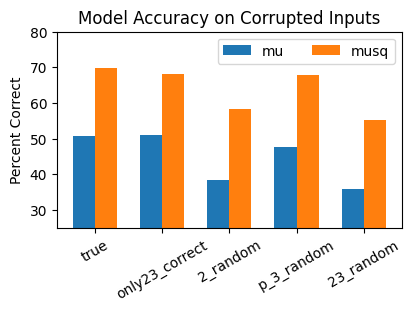

In [8]:
import matplotlib.pyplot as plt
import numpy as np


variants = (
    "true",
    "only23_correct",
    "2_random",
    "p_3_random",
    "23_random",
)
label_dict = {
    'true': "Actual",
    'only23_correct': "only_23",
    '2_random': 'bad_2',
    'p_3_random': 'bad_3',
    '23_random': 'bad_2,3'
}
mu_dict = {}
musq_dict = {}

for v in variants:
    mu_key = "mu_" + v + ".txt"
    musq_key = "musq_" + v + ".txt"
    mu_dict[v] = record[mu_key]['valid_arithmetic_correct']
    musq_dict[v] = record[musq_key]['valid_arithmetic_correct']

x = np.arange(len(variants))
width = 0.33
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=[4, 3])

for rdict in (mu_dict, musq_dict):
    offset = width * multiplier
    if rdict == mu_dict:
        _label = "mu"
    else:
        _label = "musq"
    heights = []
    for v in variants:
        heights.append(rdict[v])
    rects = ax.bar(x + offset + 0.165, heights, width, label=_label)
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel("Percent Correct")
ax.set_title("Model Accuracy on Corrupted Inputs")
ax.set_xticks(x + width, variants, rotation=30)
ax.legend(loc='upper right', ncols=2)
ax.set_ylim(25, 80)

plt.show()

There is only a small difference between having all correct inputs and using only $2$ and $3$, as expected. The parity mod $2$ seems more important to the classifier than remainder mod $3$. But both $2$ and $3$ affect the results. When both are random, the performance is worse than the "trivial" strategy of always guessing the largest class ($1$ for $\mu^2(n)$ and $0$ for $\mu(n)$).